## DSC680_project-01_Kim-Schreck

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn
from functools import reduce

In [2]:
# 03.01.01
# read csv
# dataset 암발생건수및현장별발생률24항목성별연령군_20240614155136.csv
# dt01

dt01_cancer_incidents_______00 = pd.read_csv('암발생건수및현장별발생률24항목성별연령군_20240614155136.csv')

In [3]:
# 03.01.02
# read csv
# dataset 원인별사망및사망률104항목성별연령별5년__20240614155018.csv
# dt02

dt02_rates_death____________00 = pd.read_csv('원인별사망및사망률104항목성별연령별5년__20240614155018.csv')

In [4]:
# 03.01.03
# read csv
# dataset 원인별사망및사망률104항목성별연령별5년__20240614155018.csv
# dt03

dt03_stats_screening________00 = pd.read_csv('지역별성별별위암검진진단통계_20240614154803.csv')

In [5]:
# 03.02.01
# return first ten rows
# dt01

dt01_cancer_incidents_______00.head(10)

,Cancer Site (24 items),Sex,Age group (five-year age group),2021,2021.1
0,Cancer Site (24 items),Sex,Age group (five-year age group),Case (person),Age-Specific Rate (rate per 100000)
1,All Cancers (C00-C96),Total,Total,277523,540.6
2,All Cancers (C00-C96),Total,0-4 years old,308,19.2
3,All Cancers (C00-C96),Total,5-9 years old,255,11.3
4,All Cancers (C00-C96),Total,10-14 years old,374,15.9
5,All Cancers (C00-C96),Total,15-19 years old,576,24.0
6,All Cancers (C00-C96),Total,20-24 years old,1510,47.6
7,All Cancers (C00-C96),Total,25-29 years old,3642,103.2
8,All Cancers (C00-C96),Total,30-34 years old,5787,183.0
9,All Cancers (C00-C96),Total,35-39 years old,9287,258.6


In [6]:
# 03.02.02
# return first ten rows
# dt02

dt02_rates_death____________00.head(10)

,By the cause of death(104 items),By gender,By age(by five-year age group),2022,2022.1
0,By the cause of death(104 items),By gender,By age(by five-year age group),Deaths (Person),mortality rate (per 100 thousand person)
1,Total,Total,Total,372939,727.6
2,Total,Total,0 year old,565,226.8
3,Total,Total,1-4 Years old,201,16.3
4,Total,Total,5-9 Years old,183,8.4
5,Total,Total,10-14 Years old,246,10.4
6,Total,Total,15-19 Years old,550,23.5
7,Total,Total,20-24 Years old,1073,35.5
8,Total,Total,25-29 Years old,1684,48.2
9,Total,Total,30-34 Years old,1837,56.5


In [7]:
# 03.02.03
# return first ten rows
# dt03

dt03_stats_screening________00.head(10)

,By Si/Gun/Gu(1),By Si/Gun/Gu(2),By Sex(1),By Cancer Screening Result(1),2021
0,Total,Sub Summary,Total,Total,8462570
1,Total,Sub Summary,Total,Normal,3260975
2,Total,Sub Summary,Total,Benign Lesion,4101313
3,Total,Sub Summary,Total,Suspected Stomach Cancer,7311
4,Total,Sub Summary,Total,Stomach Cancer,9317
5,Total,Sub Summary,Total,Other,1083654
6,Total,Sub Summary,Total,Previously diagnosed with cancer,18989
7,Total,Sub Summary,Male,Total,3957247
8,Total,Sub Summary,Male,Normal,1389347
9,Total,Sub Summary,Male,Benign Lesion,1990738


In [8]:
# 03.03.01
# return dimensions
# dt01

print(dt01_cancer_incidents_______00.shape)

(1501, 5)


In [9]:
# 03.03.02
# return dimensions
# dt02

print(dt02_rates_death____________00.shape)

(1561, 5)


In [10]:
# 03.03.03
# return dimensions
# dt03

print(dt03_stats_screening________00.shape)

(5607, 5)


In [11]:
# 03.04.01
# confirm column names
# dt01

dt01_cancer_incidents_______00.columns

Index(['Cancer Site (24 items)', 'Sex', 'Age group (five-year age group)',
       '2021', '2021.1'],
      dtype='object')

In [12]:
# 03.04.02
# confirm column names
# dt02

dt02_rates_death____________00.columns

Index(['By the cause of death(104 items)', 'By gender',
       'By age(by five-year age group)', '2022', '2022.1'],
      dtype='object')

In [13]:
# 03.04.03
# confirm column names
# dt03

dt03_stats_screening________00.columns

Index(['By Si/Gun/Gu(1)', 'By Si/Gun/Gu(2)', 'By Sex(1)',
       'By Cancer Screening Result(1)', '2021'],
      dtype='object')

In [14]:
# 03.05.01
# column rename to remove spaces
# dt01

dt01_cancer_incidents_______00_rn = dt01_cancer_incidents_______00.rename(columns = {
    'Cancer Site (24 items)': 'site',
    'Sex': 'gender',
    'Age group (five-year age group)': 'age_group', 
    '2021': '2021_00', 
    '2021.1': '2021_01'
    })

In [15]:
# 03.05.02
# column rename to remove spaces
# dt02

dt02_rates_death____________00_rn = dt02_rates_death____________00.rename(columns = {
    'By the cause of death(104 items)': 'cause',
    'By gender': 'gender',
    'By age(by five-year age group)': 'age_group', 
    '2021': '2021_00', 
    '2021.1': '2021_01'
    })

In [16]:
# 03.05.03
# column rename to remove spaces
# dt03

dt03_stats_screening________00_rn = dt03_stats_screening________00.rename(columns = {
    'By Si/Gun/Gu(1)': 'region_01',
    'By Si/Gun/Gu(2)': 'region_02',
    'By Sex(1)': 'gender', 
    'By Cancer Screening Result(1)': 'result', 
    '2021': '2021'
    })

In [17]:
# 03.06.01
# return first and last ten rows
# dt01

print(dt01_cancer_incidents_______00_rn.head(10))
print(dt01_cancer_incidents_______00_rn.tail(10))

                     site  ...                              2021_01
0  Cancer Site (24 items)  ...  Age-Specific Rate (rate per 100000)
1   All Cancers (C00-C96)  ...                                540.6
2   All Cancers (C00-C96)  ...                                 19.2
3   All Cancers (C00-C96)  ...                                 11.3
4   All Cancers (C00-C96)  ...                                 15.9
5   All Cancers (C00-C96)  ...                                 24.0
6   All Cancers (C00-C96)  ...                                 47.6
7   All Cancers (C00-C96)  ...                                103.2
8   All Cancers (C00-C96)  ...                                183.0
9   All Cancers (C00-C96)  ...                                258.6

[10 rows x 5 columns]
                                     site  gender  ... 2021_00 2021_01
1491  Other and unspecified (Re. C00-C96)  Female  ...     581    27.9
1492  Other and unspecified (Re. C00-C96)  Female  ...     798    36.4
1493  Other and 

In [18]:
# 03.06.02
# return first and last ten rows
# dt02

print(dt02_rates_death____________00_rn.head(10))
print(dt02_rates_death____________00_rn.tail(10))

                              cause  ...                                    2022.1
0  By the cause of death(104 items)  ...  mortality rate (per 100 thousand person)
1                             Total  ...                                     727.6
2                             Total  ...                                     226.8
3                             Total  ...                                      16.3
4                             Total  ...                                       8.4
5                             Total  ...                                      10.4
6                             Total  ...                                      23.5
7                             Total  ...                                      35.5
8                             Total  ...                                      48.2
9                             Total  ...                                      56.5

[10 rows x 5 columns]
                                                  cause  gender 

In [19]:
# 03.06.03
# return first and last ten rows
# dt03

print(dt03_stats_screening________00_rn.head(10))
print(dt03_stats_screening________00_rn.tail(10))

  region_01    region_02 gender                            result     2021
0     Total  Sub Summary  Total                             Total  8462570
1     Total  Sub Summary  Total                            Normal  3260975
2     Total  Sub Summary  Total                     Benign Lesion  4101313
3     Total  Sub Summary  Total          Suspected Stomach Cancer     7311
4     Total  Sub Summary  Total                    Stomach Cancer     9317
5     Total  Sub Summary  Total                             Other  1083654
6     Total  Sub Summary  Total  Previously diagnosed with cancer    18989
7     Total  Sub Summary   Male                             Total  3957247
8     Total  Sub Summary   Male                            Normal  1389347
9     Total  Sub Summary   Male                     Benign Lesion  1990738
     region_01    region_02  gender                            result   2021
5597      Jeju  Seogwipo-si    Male                    Stomach Cancer     17
5598      Jeju  Seogw

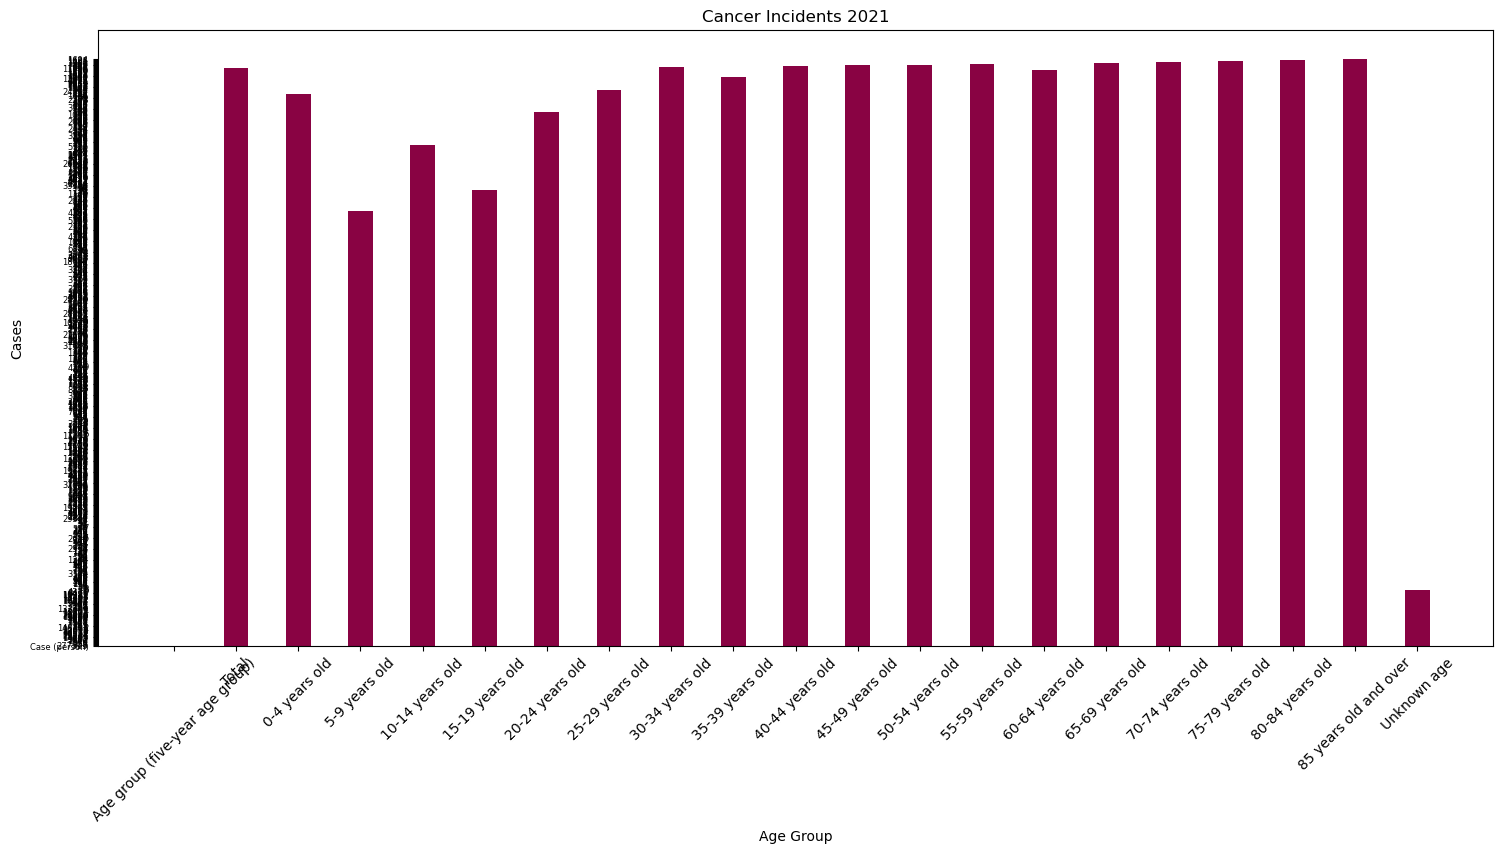

In [20]:
# 03.07.01
# render plot
# dt01

plt.figure(figsize=(18,8))
plt.bar(dt01_cancer_incidents_______00_rn['age_group'], dt01_cancer_incidents_______00_rn['2021_00'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Age Group')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2021')
plt.show()

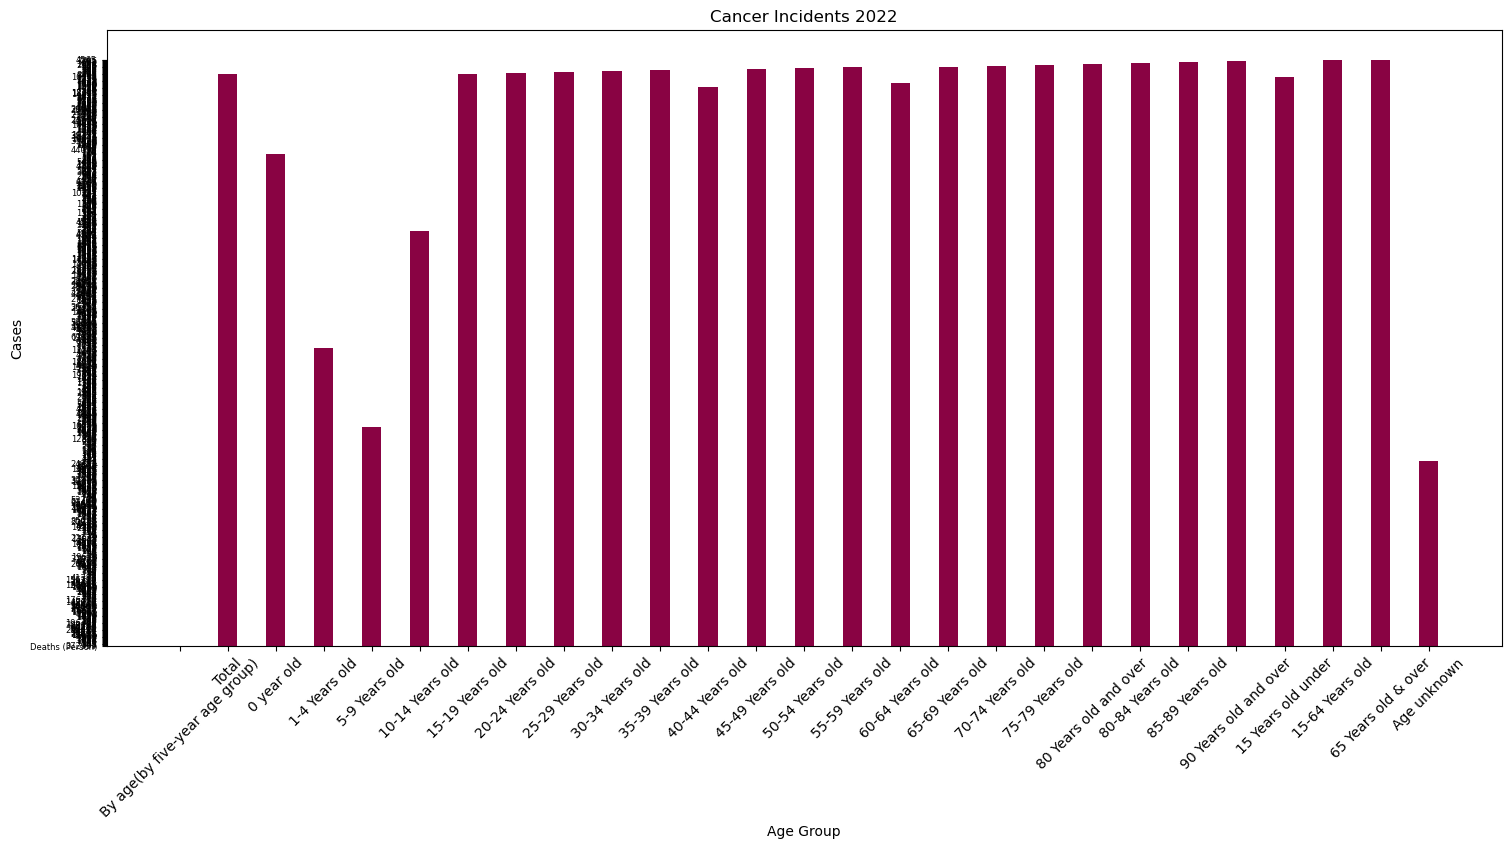

In [21]:
# 03.07.02
# render plot
# dt02

plt.figure(figsize=(18,8))
plt.bar(dt02_rates_death____________00_rn['age_group'], dt02_rates_death____________00_rn['2022'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Age Group')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2022')
plt.show()

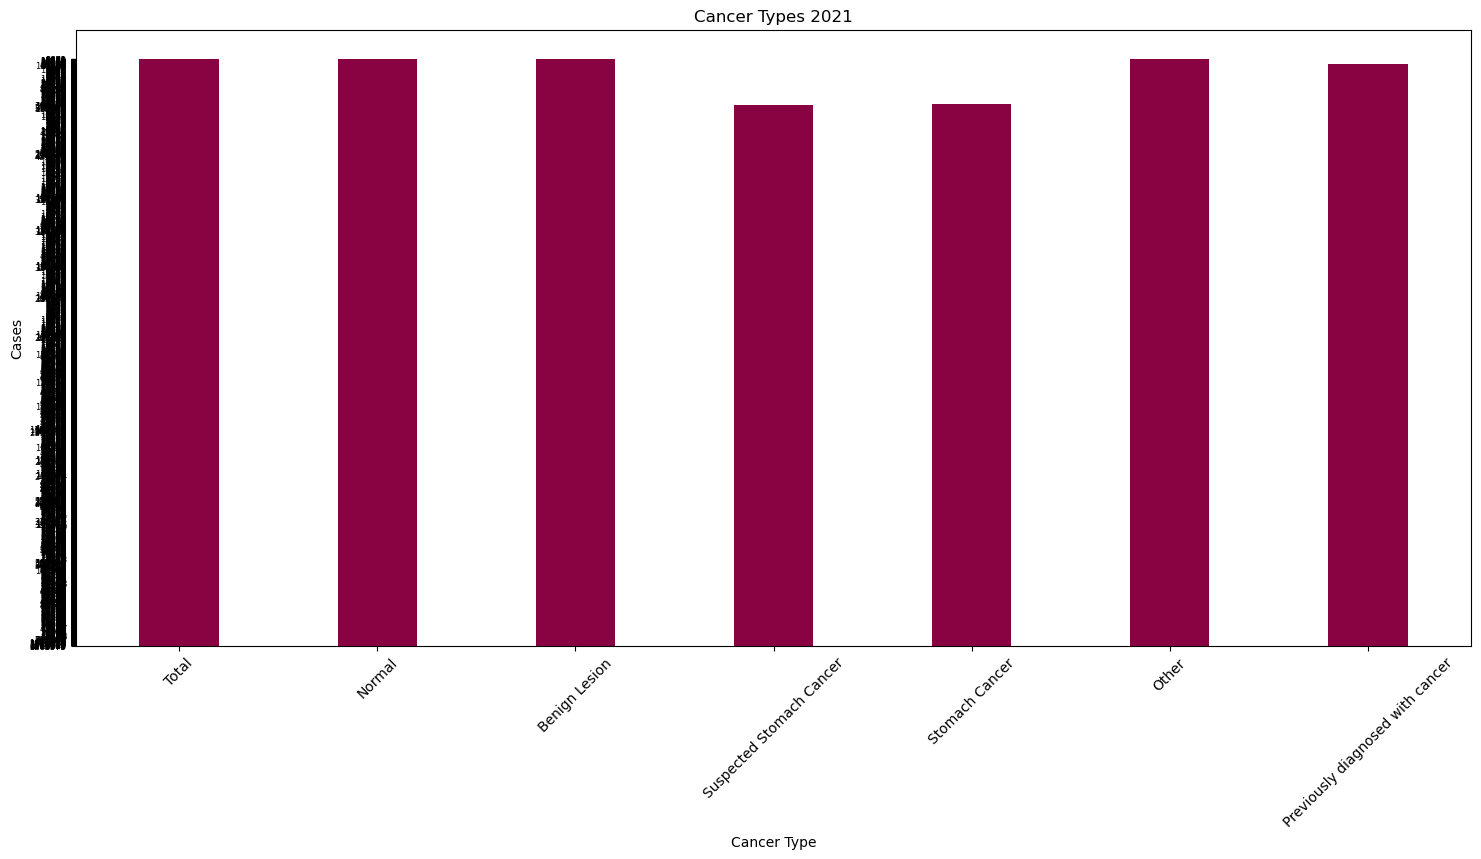

In [22]:
# 03.07.03
# render plot
# dt03

plt.figure(figsize=(18,8))
plt.bar(dt03_stats_screening________00_rn['result'], dt03_stats_screening________00_rn['2021'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Cancer Type')
plt.ylabel('Cases')
plt.title('Cancer Types 2021')
plt.show()

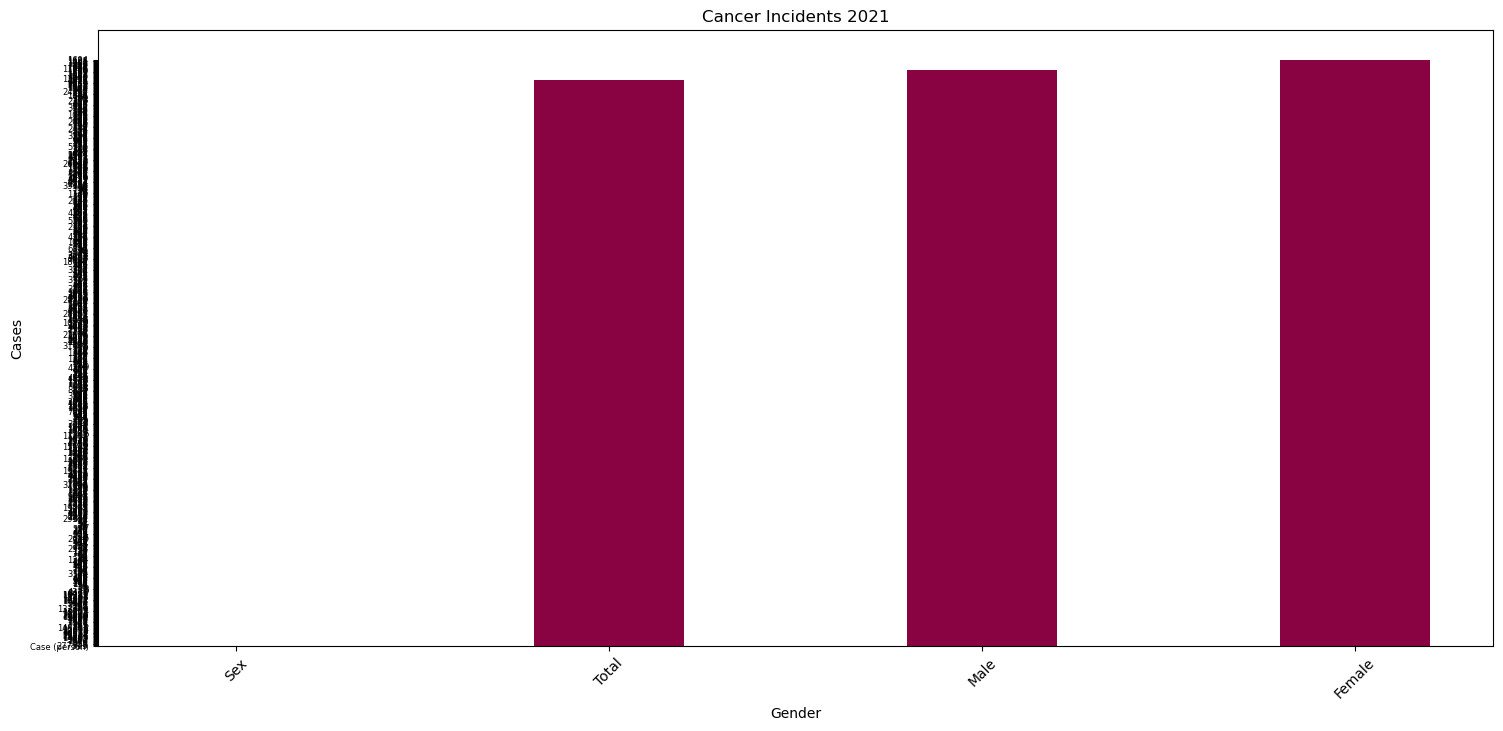

In [23]:
# 03.07.04
# rendered plot
# dt01

plt.figure(figsize=(18,8))
plt.bar(dt01_cancer_incidents_______00_rn['gender'], dt01_cancer_incidents_______00_rn['2021_00'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2021')
plt.show()

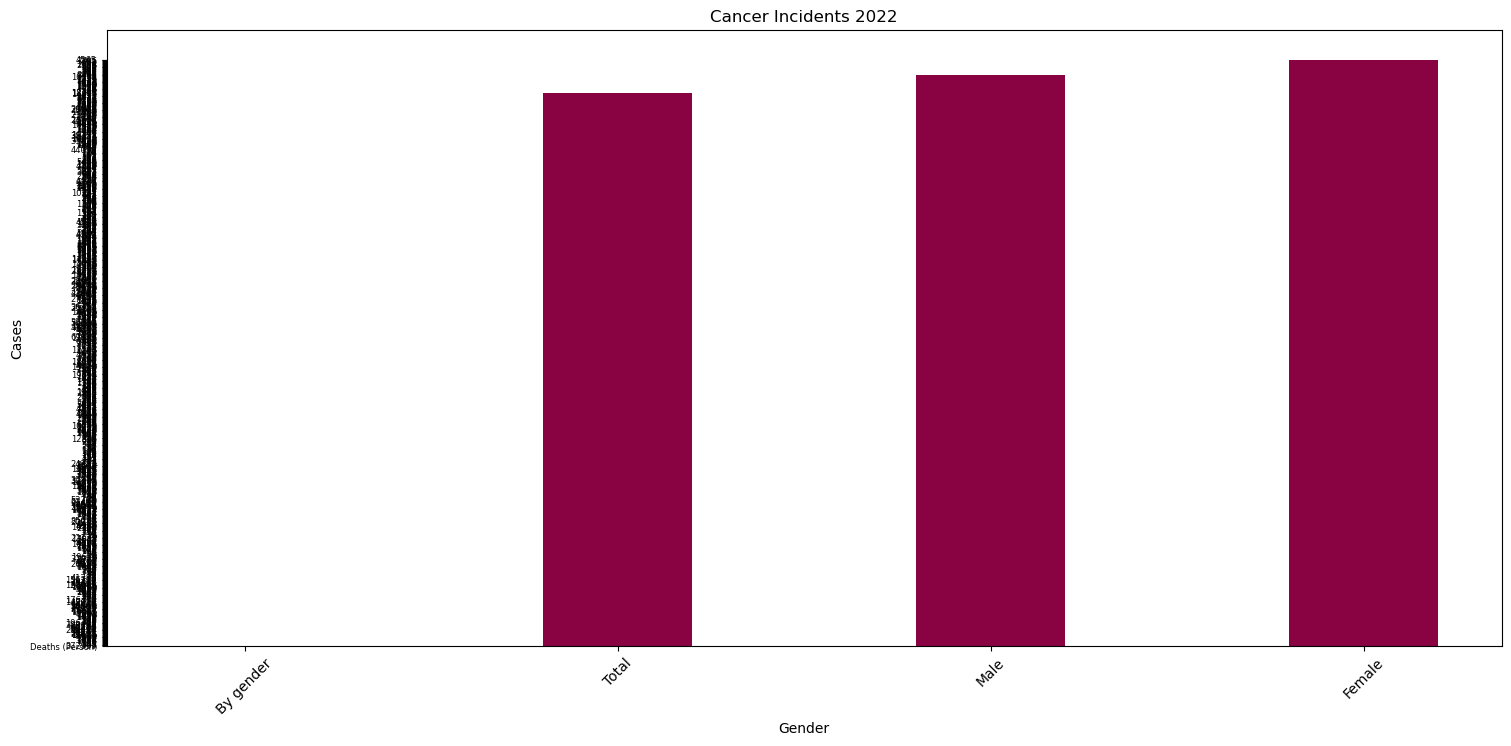

In [24]:
# 03.07.05
# rendered plot
# dt02

plt.figure(figsize=(18,8))
plt.bar(dt02_rates_death____________00_rn['gender'], dt02_rates_death____________00_rn['2022'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2022')
plt.show()

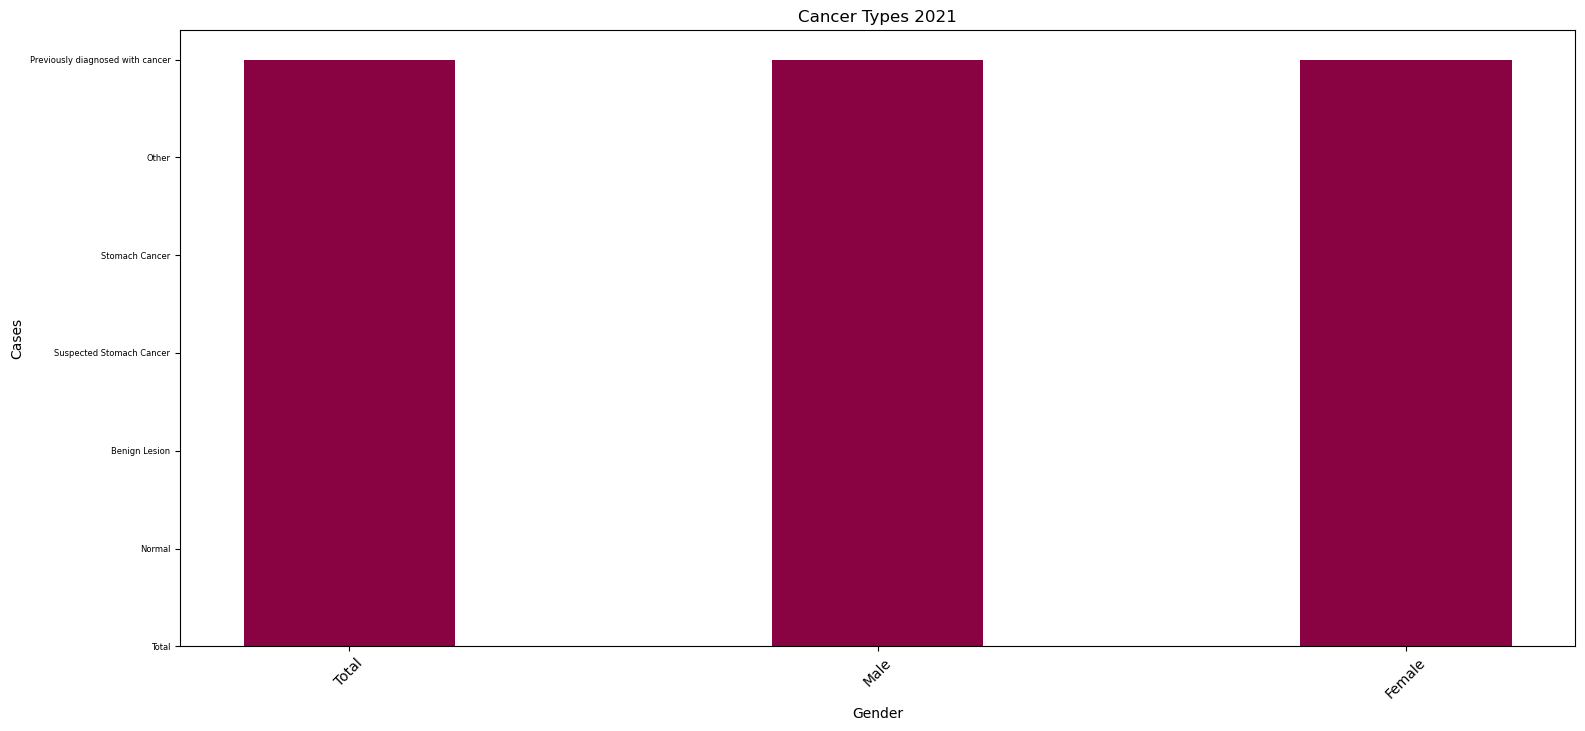

In [25]:
# 03.07.06
# render plot
# dt03

plt.figure(figsize=(18,8))
plt.bar(dt03_stats_screening________00_rn['gender'], dt03_stats_screening________00_rn['result'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Cases')
plt.title('Cancer Types 2021')
plt.show()

In [26]:
# 03.08.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt03

'''dt03_stats_screening________00_rn.insert(0, 'index', range(0, 0 + len(dt03_stats_screening________00_rn)))'''

"dt03_stats_screening________00_rn.insert(0, 'index', range(0, 0 + len(dt03_stats_screening________00_rn)))"

In [27]:
# 03.08.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt03

'''dt03_stats_screening________00_rn_dv = pd.get_dummies(dt03_stats_screening________00_rn, drop_first = True, dtype = int)'''

'dt03_stats_screening________00_rn_dv = pd.get_dummies(dt03_stats_screening________00_rn, drop_first = True, dtype = int)'

In [28]:
# 03.08.03
# preparing data for modeling
# split data
# select columns 
# dt03

'''dt03_x01 = dt03_stats_screening________00_rn_dv.drop(['gender'], axis = 1)
dt03_y01 = dt03_stats_screening________00_rn_dv['gender']'''

"dt03_x01 = dt03_stats_screening________00_rn_dv.drop(['gender'], axis = 1)\ndt03_y01 = dt03_stats_screening________00_rn_dv['gender']"

In [29]:
# 03.08.04
# preparing data for modeling
# split into train and test 
# dt03

'''dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size = 0.3, random_state = 0)'''

'dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size = 0.3, random_state = 0)'

In [30]:
# 03.08.05
# preparing data for modeling
# assign regression variable 
# dt03

'''dt03_lr01 = LinearRegression()'''

'dt03_lr01 = LinearRegression()'

In [31]:
# 03.08.06
# fit data for modeling
# fit variables to model 
# dt03

'''dt03_lr01.fit(dt03_x01_trn, dt03_y01_trn)'''

'dt03_lr01.fit(dt03_x01_trn, dt03_y01_trn)'

In [32]:
# 03.08.07
# predict data for modeling
# fit variables to model 
# dt03

'''dt03_y01_pdct = dt03_lr01.predict(dt03_x01_tst)'''

'dt03_y01_pdct = dt03_lr01.predict(dt03_x01_tst)'

In [33]:
# 03.08.08
# preparing data for modeling
# assign variable for rmse and r2 
# dt03

'''dt03_rmse01 = np.sqrt(mean_squared_error(dt03_y01_tst, dt03_y01_pdct))
dt03_r201 = r2_score(dt03_y01_tst, dt03_y01_pdct)'''

'dt03_rmse01 = np.sqrt(mean_squared_error(dt03_y01_tst, dt03_y01_pdct))\ndt03_r201 = r2_score(dt03_y01_tst, dt03_y01_pdct)'

In [34]:
# 03.08.09
# run model
# return rmse and r2 dt03
# rmse: 
# r2: 
# dt03

'''print(f'rmse: {dt03_rmse01}')
print(f'r2: {dt03_r201}')'''

"print(f'rmse: {dt03_rmse01}')\nprint(f'r2: {dt03_r201}')"

In [35]:
# 03.08.10
# assign variable for pca
# dt03

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [36]:
# 03.08.11
# calculate pca
# dt03

'''pca.fit(dt03_x01_trn)
dt03_x01_pca_trn = pca.transform(dt03_x01_trn)
dt03_x01_pca_tst = pca.transform(dt03_x01_tst)'''

'pca.fit(dt03_x01_trn)\ndt03_x01_pca_trn = pca.transform(dt03_x01_trn)\ndt03_x01_pca_tst = pca.transform(dt03_x01_tst)'

In [37]:
# 03.08.12
# return pca calculation matrix
# dt03

'''print(f'features in pca matrix: {dt03_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt03_x01_pca_trn.shape[1]}')"

In [38]:
# 03.09.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt02

'''dt02_rates_death____________00_rn.insert(0, 'index', range(0, 0 + len(dt02_rates_death____________00_rn)))'''

"dt02_rates_death____________00_rn.insert(0, 'index', range(0, 0 + len(dt02_rates_death____________00_rn)))"

In [39]:
# 03.09.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt02

'''dt02_rates_death____________00_rn_dv = pd.get_dummies(dt02_rates_death____________00_rn, drop_first = True, dtype = int)'''

'dt02_rates_death____________00_rn_dv = pd.get_dummies(dt02_rates_death____________00_rn, drop_first = True, dtype = int)'

In [40]:
# 03.09.03
# preparing data for modeling
# split data
# select columns 
# dt02

'''dt02_x01 = dt02_rates_death____________00_rn_dv.drop(['gender'], axis = 1)
dt02_y01 = dt02_rates_death____________00_rn_dv['gender']'''

"dt02_x01 = dt02_rates_death____________00_rn_dv.drop(['gender'], axis = 1)\ndt02_y01 = dt02_rates_death____________00_rn_dv['gender']"

In [41]:
# 03.09.04
# preparing data for modeling
# split into train and test 
# dt02

'''dt02_x01_trn, dt02_x01_tst, dt02_y01_trn, dt02_y01_tst = train_test_split(dt02_x01, dt02_y01, test_size = 0.3, random_state = 0)'''

'dt02_x01_trn, dt02_x01_tst, dt02_y01_trn, dt02_y01_tst = train_test_split(dt02_x01, dt02_y01, test_size = 0.3, random_state = 0)'

In [42]:
# 03.09.05
# preparing data for modeling
# assign regression variable 
# dt02

'''dt02_lr01 = LinearRegression()'''

'dt02_lr01 = LinearRegression()'

In [43]:
# 03.09.06
# fit data for modeling
# fit variables to model 
# dt02

'''dt02_lr01.fit(dt02_x01_trn, dt02_y01_trn)'''

'dt02_lr01.fit(dt02_x01_trn, dt02_y01_trn)'

In [44]:
# 03.09.07
# predict data for modeling
# fit variables to model 
# dt02

'''dt02_y01_pdct = dt02_lr01.predict(dt02_x01_tst)'''

'dt02_y01_pdct = dt02_lr01.predict(dt02_x01_tst)'

In [45]:
# 03.09.08
# preparing data for modeling
# assign variable for rmse and r2 
# dt02

'''dt02_rmse01 = np.sqrt(mean_squared_error(dt02_y01_tst, dt02_y01_pdct))
dt02_r201 = r2_score(dt02_y01_tst, dt02_y01_pdct)'''

'dt02_rmse01 = np.sqrt(mean_squared_error(dt02_y01_tst, dt02_y01_pdct))\ndt02_r201 = r2_score(dt02_y01_tst, dt02_y01_pdct)'

In [46]:
# 03.09.09
# run model
# return rmse and r2 dt02
# rmse: 
# r2: 
# dt02

'''print(f'rmse: {dt02_rmse01}')
print(f'r2: {dt02_r201}')'''

"print(f'rmse: {dt02_rmse01}')\nprint(f'r2: {dt02_r201}')"

In [47]:
# 03.09.10
# assign variable for pca
# dt02

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [48]:
# 03.09.11
# calculate pca
# dt02

'''pca.fit(dt02_x01_trn)
dt02_x01_pca_trn = pca.transform(dt02_x01_trn)
dt02_x01_pca_tst = pca.transform(dt02_x01_tst)'''

'pca.fit(dt02_x01_trn)\ndt02_x01_pca_trn = pca.transform(dt02_x01_trn)\ndt02_x01_pca_tst = pca.transform(dt02_x01_tst)'

In [49]:
# 03.09.12
# return pca calculation matrix
# dt02

'''print(f'features in pca matrix: {dt02_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt02_x01_pca_trn.shape[1]}')"

In [50]:
# 03.10.01
# read csv
# dataset Worldwide Cancer Dataset (females) .csv
# dt04

dt04_WW_cancer_DS_fem_______00 = pd.read_csv('Worldwide Cancer Dataset (females) .csv')

In [51]:
# 03.10.02
# read csv
# dataset Worldwide Cancer Dataset (Males) .csv
# dt05

dt05_WW_cancer_DS_mal_______00 = pd.read_csv('Worldwide Cancer Dataset (Males) .csv')

In [52]:
# 03.10.03
# read csv
# dataset Worldwide Cancer Dataset.csv
# dt06

dt06_WW_cancer_DS_all_______00 = pd.read_csv('Worldwide Cancer Dataset.csv')

In [53]:
# 03.11.01
# return first and last ten rows
# dt04

print(dt04_WW_cancer_DS_fem_______00.head(10))
print(dt04_WW_cancer_DS_fem_______00.tail(10))

   Rank         Cancer New cases in 2020  % of all cancers
0   NaN   All cancers*         8,751,759               NaN
1   1.0         Breast         2,261,419              25.8
2   2.0  Colorectal **           865,630               9.9
3   3.0           Lung           770,828               8.8
4   4.0   Cervix uteri           604,127               6.9
5   5.0        Thyroid           448,915               5.1
6   6.0   Corpus uteri           417,367               4.8
7   7.0        Stomach           369,580               4.2
8   8.0          Ovary           313,959               3.6
9   9.0          Liver           273,357               3.1
    Rank            Cancer New cases in 2020  % of all cancers
21  21.0             Vulva            45,240               0.5
22  22.0       Nasopharynx            36,983               0.4
23  23.0  Hodgkin lymphoma            34,106               0.4
24  24.0            Larynx            24,350               0.3
25  25.0   Salivary glands          

In [54]:
# 03.11.02
# return first and last ten rows
# dt05

print(dt05_WW_cancer_DS_mal_______00.head(10))
print(dt05_WW_cancer_DS_mal_______00.tail(10))

   Rank                Cancer New cases in 2020  % of all cancers
0   NaN          All cancers*         9,342,957               NaN
1   1.0                  Lung         1,435,943              15.4
2   2.0              Prostate         1,414,259              15.1
3   3.0          Colorectal**         1,065,960              11.4
4   4.0               Stomach           719,523               7.7
5   5.0                 Liver           632,320               6.8
6   6.0               Bladder           440,864               4.7
7   7.0            Oesophagus           418,350               4.5
8   8.0  Non-Hodgkin lymphoma           304,151               3.3
9   9.0                Kidney           271,249               2.9
    Rank            Cancer New cases in 2020  % of all cancers
18  18.0       Nasopharynx            96,371               1.0
19  19.0        Oropharynx            79,045               0.8
20  20.0            Testis            74,458               0.8
21  21.0       Hypopha

In [55]:
# 03.11.03
# return first and last ten rows
# dt06

print(dt06_WW_cancer_DS_all_______00.head(10))
print(dt06_WW_cancer_DS_all_______00.tail(10))

   Rank        Cancer New cases in 2020  % of all cancers
0   NaN  All cancers*        18,094,716               NaN
1   1.0        Breast         2,261,419              12.5
2   2.0          Lung         2,261,771              12.2
3   3.0  Colorectal**         1,931,590              10.7
4   4.0      Prostate         1,414,259               7.8
5   5.0       Stomach         1,089,103               6.0
6   6.0         Liver           905,677               5.0
7   7.0  Cervix uteri           604,127               3.3
8   8.0    Oesophagus           604,100               3.3
9   9.0       Thyroid           586,202               3.2
    Rank            Cancer New cases in 2020  % of all cancers
24  24.0        Oropharynx            98,412               0.5
25  25.0       Hypopharynx            84,254               0.5
26  26.0  Hodgkin lymphoma            83,087               0.5
27  27.0            Testis            74,458               0.4
28  28.0   Salivary glands            53,583   

In [56]:
# 03.12.01
# column rename to remove spaces
# dt04

dt04_WW_cancer_DS_fem_______00_rn = dt04_WW_cancer_DS_fem_______00.rename(columns = {
    'Rank': 'rank',
    'Cancer': 'type',
    'New cases in 2020': '2020', 
    '% of all cancers': 'percent'
    })

In [57]:
# 03.12.02
# column rename to remove spaces
# dt05

dt05_WW_cancer_DS_mal_______00_rn = dt05_WW_cancer_DS_mal_______00.rename(columns = {
    'Rank': 'rank',
    'Cancer': 'type',
    'New cases in 2020': '2020', 
    '% of all cancers': 'percent'
    })

In [58]:
# 03.12.03
# column rename to remove spaces
# dt06

dt06_WW_cancer_DS_all_______00_rn = dt06_WW_cancer_DS_all_______00.rename(columns = {
    'Rank': 'rank',
    'Cancer': 'type',
    'New cases in 2020': '2020', 
    '% of all cancers': 'percent'
    })

In [59]:
# 03.13.01
# return first and last ten rows
# dt04

print(dt04_WW_cancer_DS_fem_______00_rn.head(10))
print(dt04_WW_cancer_DS_fem_______00_rn.tail(10))

   rank           type       2020  percent
0   NaN   All cancers*  8,751,759      NaN
1   1.0         Breast  2,261,419     25.8
2   2.0  Colorectal **    865,630      9.9
3   3.0           Lung    770,828      8.8
4   4.0   Cervix uteri    604,127      6.9
5   5.0        Thyroid    448,915      5.1
6   6.0   Corpus uteri    417,367      4.8
7   7.0        Stomach    369,580      4.2
8   8.0          Ovary    313,959      3.6
9   9.0          Liver    273,357      3.1
    rank              type    2020  percent
21  21.0             Vulva  45,240      0.5
22  22.0       Nasopharynx  36,983      0.4
23  23.0  Hodgkin lymphoma  34,106      0.4
24  24.0            Larynx  24,350      0.3
25  25.0   Salivary glands  23,889      0.3
26  26.0        Oropharynx  19,367      0.2
27  27.0            Vagina  17,908      0.2
28  28.0       Hypopharynx  14,000      0.2
29  29.0    Kaposi sarcoma  10,857      0.1
30  30.0      Mesothelioma   9,310      0.1


In [60]:
# 03.13.02
# return first and last ten rows
# dt05

print(dt05_WW_cancer_DS_mal_______00_rn.head(10))
print(dt05_WW_cancer_DS_mal_______00_rn.tail(10))

   rank                  type       2020  percent
0   NaN          All cancers*  9,342,957      NaN
1   1.0                  Lung  1,435,943     15.4
2   2.0              Prostate  1,414,259     15.1
3   3.0          Colorectal**  1,065,960     11.4
4   4.0               Stomach    719,523      7.7
5   5.0                 Liver    632,320      6.8
6   6.0               Bladder    440,864      4.7
7   7.0            Oesophagus    418,350      4.5
8   8.0  Non-Hodgkin lymphoma    304,151      3.3
9   9.0                Kidney    271,249      2.9
    rank              type    2020  percent
18  18.0       Nasopharynx  96,371      1.0
19  19.0        Oropharynx  79,045      0.8
20  20.0            Testis  74,458      0.8
21  21.0       Hypopharynx  70,254      0.8
22  22.0  Hodgkin lymphoma  48,981      0.5
23  23.0       Gallbladder  41,062      0.4
24  24.0             Penis  36,068      0.4
25  25.0   Salivary glands  29,694      0.3
26  26.0    Kaposi sarcoma  23,413      0.3
27  27.0  

In [61]:
# 03.13.03
# return first and last ten rows
# dt06

print(dt06_WW_cancer_DS_all_______00_rn.head(10))
print(dt06_WW_cancer_DS_all_______00_rn.tail(10))

   rank          type        2020  percent
0   NaN  All cancers*  18,094,716      NaN
1   1.0        Breast   2,261,419     12.5
2   2.0          Lung   2,261,771     12.2
3   3.0  Colorectal**   1,931,590     10.7
4   4.0      Prostate   1,414,259      7.8
5   5.0       Stomach   1,089,103      6.0
6   6.0         Liver     905,677      5.0
7   7.0  Cervix uteri     604,127      3.3
8   8.0    Oesophagus     604,100      3.3
9   9.0       Thyroid     586,202      3.2
    rank              type    2020  percent
24  24.0        Oropharynx  98,412      0.5
25  25.0       Hypopharynx  84,254      0.5
26  26.0  Hodgkin lymphoma  83,087      0.5
27  27.0            Testis  74,458      0.4
28  28.0   Salivary glands  53,583      0.3
29  29.0             Vulva  45,240      0.3
30  30.0             Penis  36,068      0.2
31  31.0    Kaposi sarcoma  34,270      0.2
32  32.0      Mesothelioma  30,870      0.2
33  33.0            Vagina  17,908      0.1


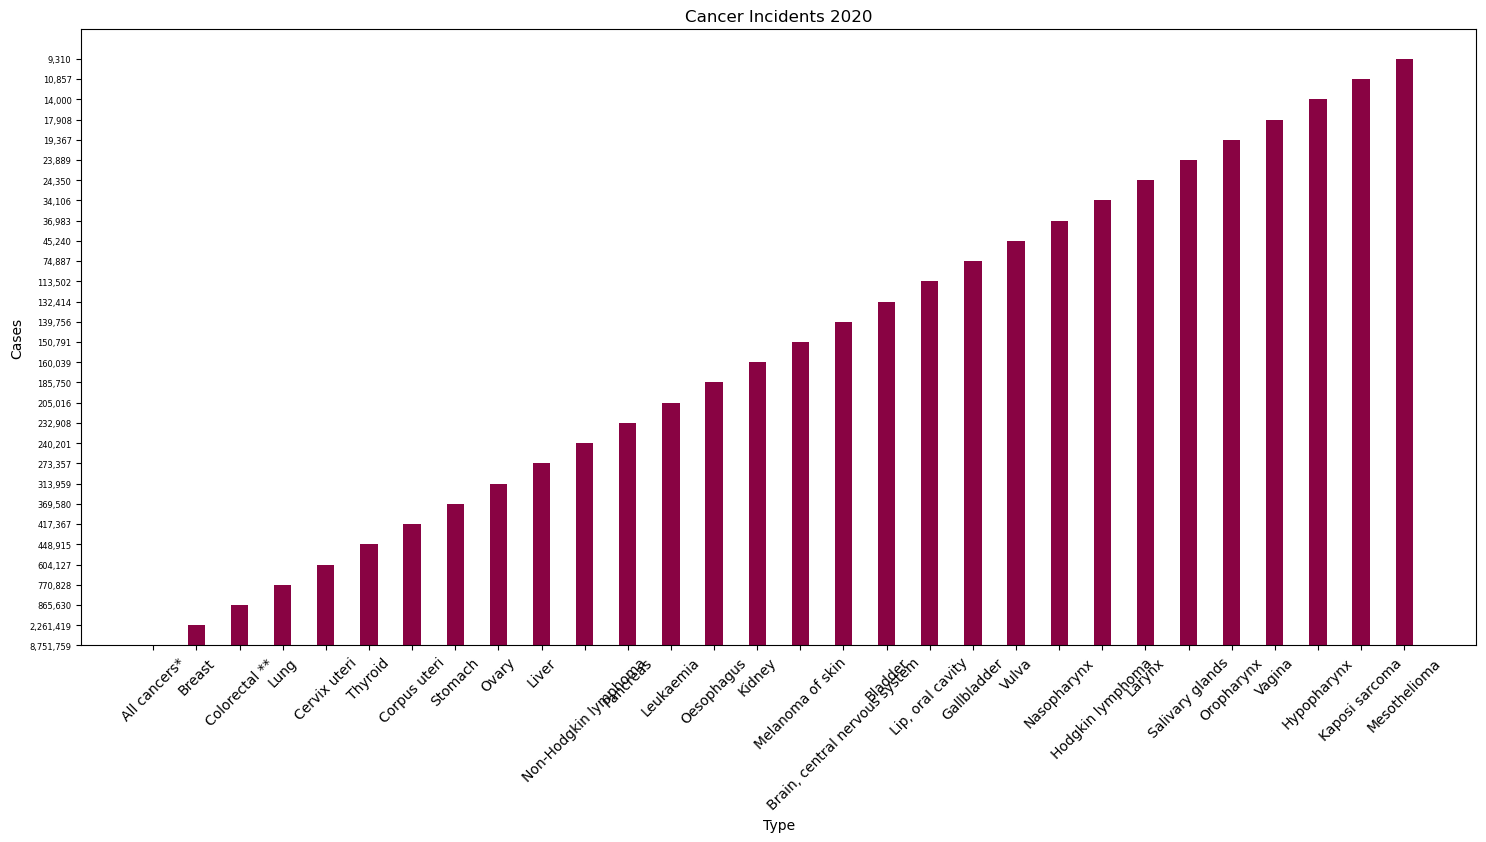

In [62]:
# 03.14.01
# render plot
# dt04

plt.figure(figsize=(18,8))
plt.bar(dt04_WW_cancer_DS_fem_______00_rn['type'], dt04_WW_cancer_DS_fem_______00_rn['2020'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2020')
plt.show()

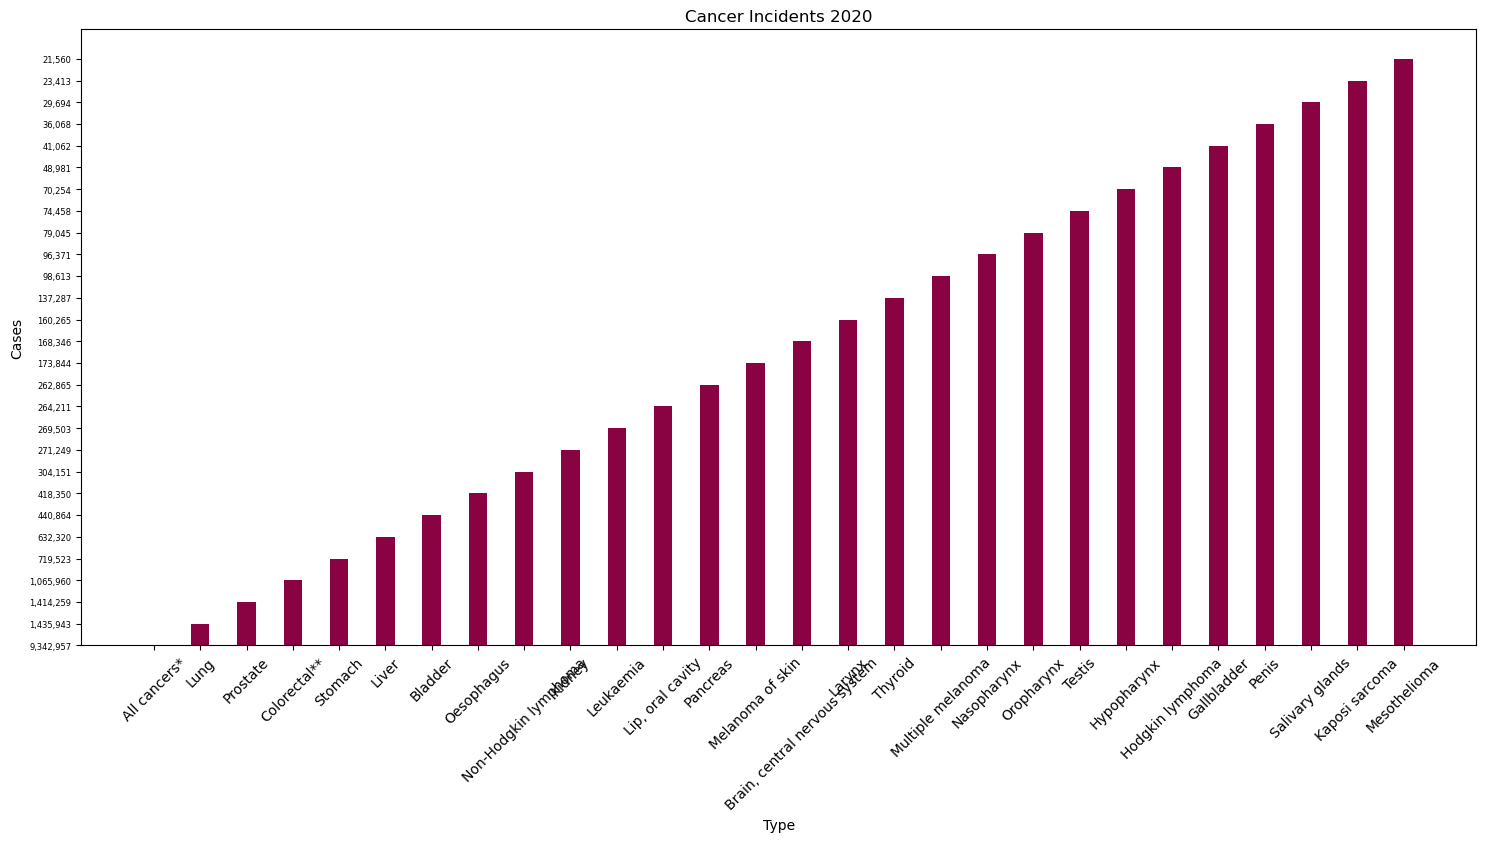

In [63]:
# 03.14.02
# render plot
# dt05

plt.figure(figsize=(18,8))
plt.bar(dt05_WW_cancer_DS_mal_______00_rn['type'], dt05_WW_cancer_DS_mal_______00_rn['2020'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2020')
plt.show()

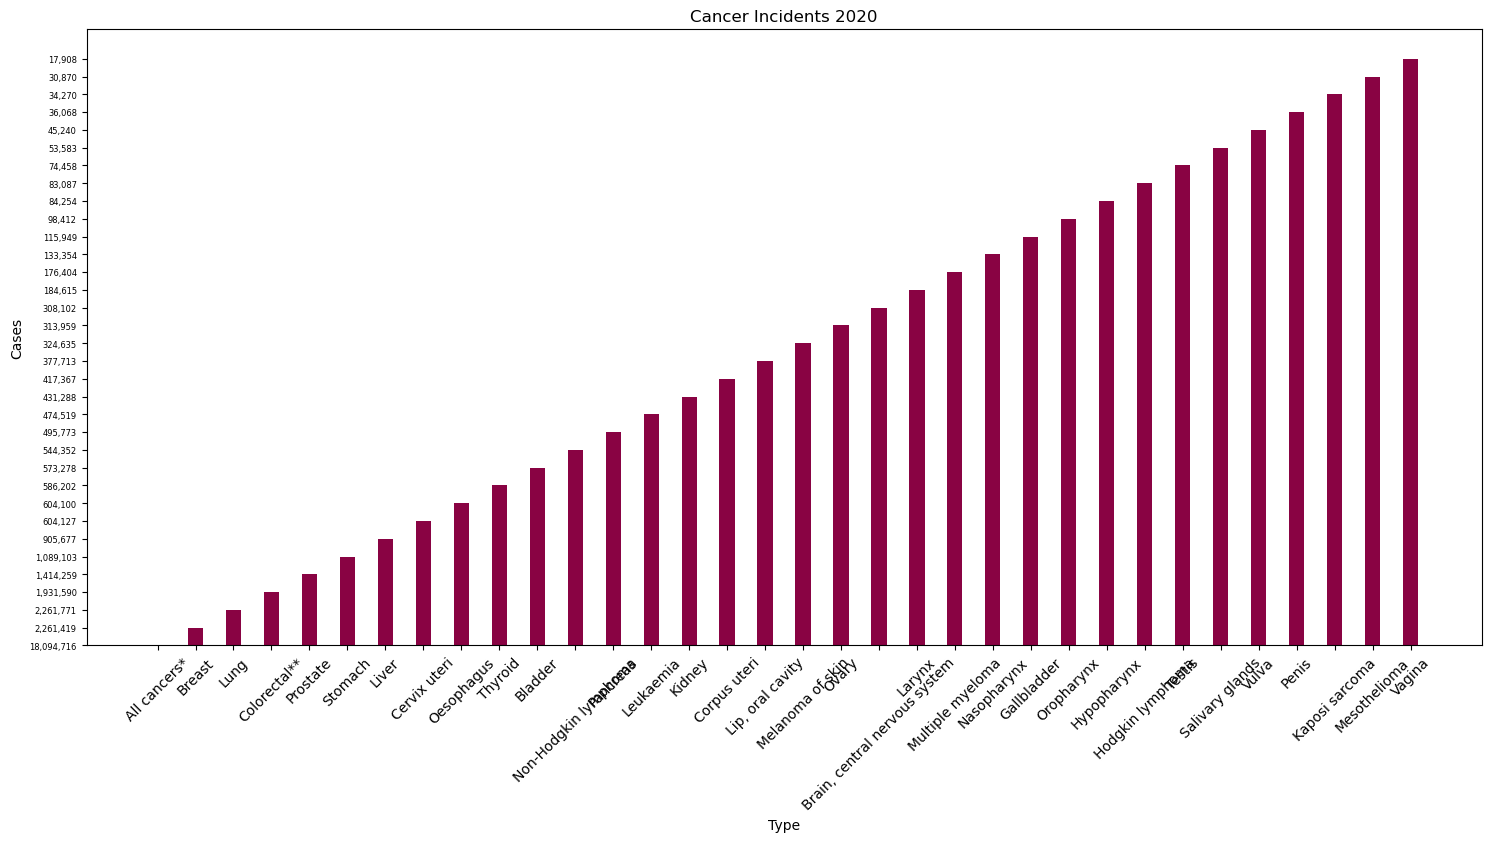

In [64]:
# 03.14.03
# render plot
# dt06

plt.figure(figsize=(18,8))
plt.bar(dt06_WW_cancer_DS_all_______00_rn['type'], dt06_WW_cancer_DS_all_______00_rn['2020'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Cases')
plt.title('Cancer Incidents 2020')
plt.show()

In [65]:
# 03.15.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt03

'''dt03_stats_screening________00_rn.insert(0, 'index', range(0, 0 + len(dt03_stats_screening________00_rn)))'''

"dt03_stats_screening________00_rn.insert(0, 'index', range(0, 0 + len(dt03_stats_screening________00_rn)))"

In [66]:
# 03.15.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt03

'''dt03_stats_screening________00_rn_dv = pd.get_dummies(dt03_stats_screening________00_rn, drop_first = True, dtype = int)'''

'dt03_stats_screening________00_rn_dv = pd.get_dummies(dt03_stats_screening________00_rn, drop_first = True, dtype = int)'

In [67]:
# 03.15.03
# preparing data for modeling
# split data
# select columns 
# dt03

'''dt03_x01 = dt03_stats_screening________00_rn_dv.drop(['gender'], axis = 1)
dt03_y01 = dt03_stats_screening________00_rn_dv['gender']'''

"dt03_x01 = dt03_stats_screening________00_rn_dv.drop(['gender'], axis = 1)\ndt03_y01 = dt03_stats_screening________00_rn_dv['gender']"

In [68]:
# 03.15.04
# preparing data for modeling
# split into train and test 
# dt03

'''dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size = 0.3, random_state = 0)'''

'dt03_x01_trn, dt03_x01_tst, dt03_y01_trn, dt03_y01_tst = train_test_split(dt03_x01, dt03_y01, test_size = 0.3, random_state = 0)'

In [69]:
# 03.15.05
# preparing data for modeling
# assign regression variable 
# dt03

'''dt03_lr01 = LinearRegression()'''

'dt03_lr01 = LinearRegression()'

In [70]:
# 03.15.06
# fit data for modeling
# fit variables to model 
# dt03

'''dt03_lr01.fit(dt03_x01_trn, dt03_y01_trn)'''

'dt03_lr01.fit(dt03_x01_trn, dt03_y01_trn)'

In [71]:
# 03.15.07
# predict data for modeling
# fit variables to model 
# dt03

'''dt03_y01_pdct = dt03_lr01.predict(dt03_x01_tst)'''

'dt03_y01_pdct = dt03_lr01.predict(dt03_x01_tst)'

In [72]:
# 03.15.08
# preparing data for modeling
# assign variable for rmse and r2 
# dt03

'''dt03_rmse01 = np.sqrt(mean_squared_error(dt03_y01_tst, dt03_y01_pdct))
dt03_r201 = r2_score(dt03_y01_tst, dt03_y01_pdct)'''

'dt03_rmse01 = np.sqrt(mean_squared_error(dt03_y01_tst, dt03_y01_pdct))\ndt03_r201 = r2_score(dt03_y01_tst, dt03_y01_pdct)'

In [73]:
# 03.15.09
# run model
# return rmse and r2 dt03
# rmse: 
# r2: 
# dt03

'''print(f'rmse: {dt03_rmse01}')
print(f'r2: {dt03_r201}')'''

"print(f'rmse: {dt03_rmse01}')\nprint(f'r2: {dt03_r201}')"

In [74]:
# 03.15.10
# assign variable for pca
# dt03

'''pca = PCA(.9)'''

'pca = PCA(.9)'

In [75]:
# 03.15.11
# calculate pca
# dt03

'''pca.fit(dt03_x01_trn)
dt03_x01_pca_trn = pca.transform(dt03_x01_trn)
dt03_x01_pca_tst = pca.transform(dt03_x01_tst)'''

'pca.fit(dt03_x01_trn)\ndt03_x01_pca_trn = pca.transform(dt03_x01_trn)\ndt03_x01_pca_tst = pca.transform(dt03_x01_tst)'

In [76]:
# 03.15.12
# return pca calculation matrix
# dt03

'''print(f'features in pca matrix: {dt03_x01_pca_trn.shape[1]}')'''

"print(f'features in pca matrix: {dt03_x01_pca_trn.shape[1]}')"

In [77]:
# 03.16.01
# read csv
# dataset Worldwide Cancer Dataset.csv
# dt07

dt07_rates_cancer___________00 = pd.read_csv('Cancer_Rates.csv')

In [78]:
# 03.16.02
# return first and last ten rows
# dt07

print(dt07_rates_cancer___________00.head(10))
print(dt07_rates_cancer___________00.tail(10))

   FID    ZIP  Colorectal  ...   All_Cancer   SHAPE_Length    SHAPE_Area
0    1  60002  218.062127  ...  2703.147501  215525.155184  1.149062e+09
1    2  60010  258.915706  ...  3248.829251  178637.109618  8.027354e+08
2    3  60015  153.435867  ...  2922.587952  111400.890558  3.674576e+08
3    4  60020  292.797189  ...  3084.130392   92363.084625  1.666177e+08
4    5  60030  221.535432  ...  2581.845035  247258.224672  8.455179e+08
5    6  60031  163.502110  ...  2217.827004  163995.181561  5.271176e+08
6    7  60035  241.311124  ...  3760.431679  115796.723820  3.457929e+08
7    8  60040   55.555556  ...  1796.296296   25907.372467  1.780943e+07
8    9  60042  140.252454  ...  2267.414680   45385.395226  4.517757e+07
9   10  60044  206.547558  ...  3149.850253   92539.708731  2.127777e+08

[10 rows x 10 columns]
    FID    ZIP  Colorectal  ...   All_Cancer   SHAPE_Length    SHAPE_Area
17   18  60069  457.776172  ...  4505.481267  146555.427438  1.700669e+08
18   19  60073  103.32950

In [79]:
# 03.16.03
# return columns
# dt07

dt07_rates_cancer___________00.columns

Index(['FID', 'ZIP', 'Colorectal', 'Lung_Bronc', 'Breast_Can', 'Prostate_C',
       'Urinary_Sy', 'All_Cancer', 'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')

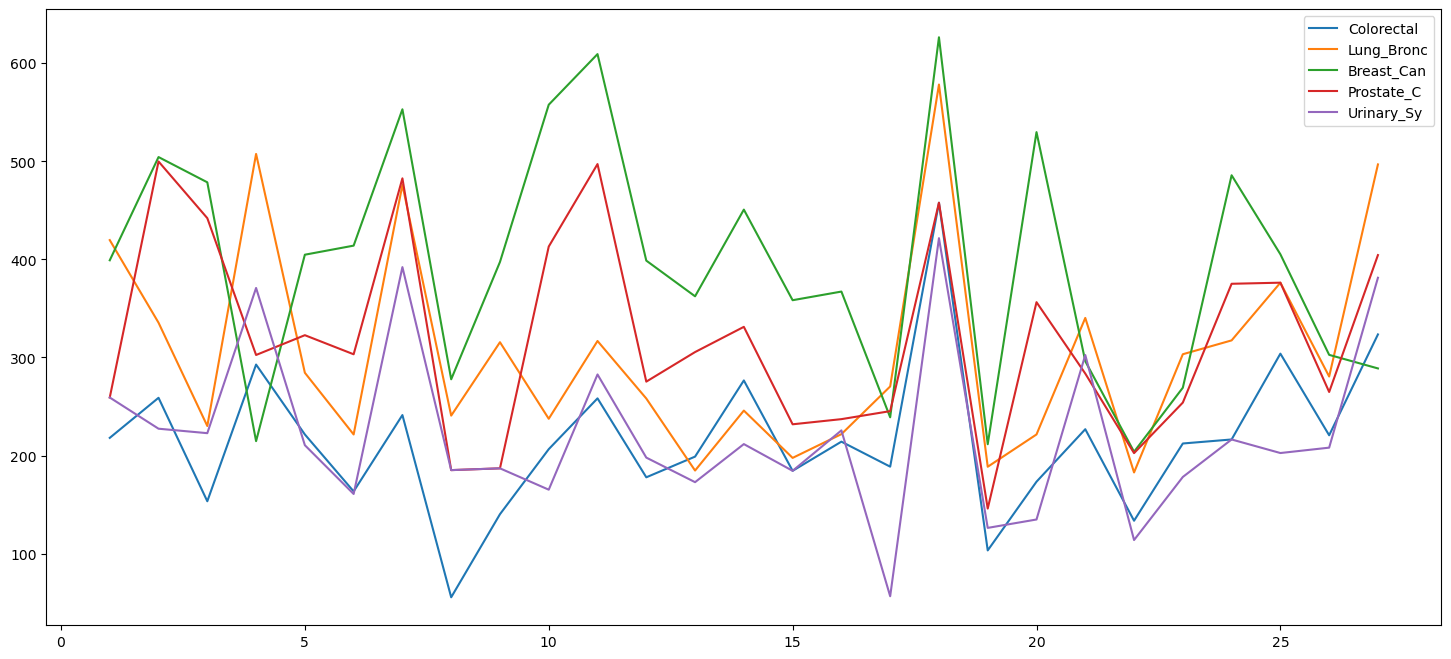

In [80]:
# 03.16.04
# render plot
# dt07

dt07_x00 = dt07_rates_cancer___________00['FID']
dt07_y01 = dt07_rates_cancer___________00['Colorectal']
dt07_y02 = dt07_rates_cancer___________00['Lung_Bronc']
dt07_y03 = dt07_rates_cancer___________00['Breast_Can']
dt07_y04 = dt07_rates_cancer___________00['Prostate_C']
dt07_y05 = dt07_rates_cancer___________00['Urinary_Sy']
plt.figure(figsize=(18,8))
plt.plot(dt07_x00, dt07_y01, label = "Colorectal", linestyle="-")
plt.plot(dt07_x00, dt07_y02, label = "Lung_Bronc", linestyle="-")
plt.plot(dt07_x00, dt07_y03, label = "Breast_Can", linestyle="-")
plt.plot(dt07_x00, dt07_y04, label = "Prostate_C", linestyle="-")
plt.plot(dt07_x00, dt07_y05, label = "Urinary_Sy", linestyle="-")
plt.legend() 
plt.show()

In [81]:
# 03.17.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt07

dt07_rates_cancer___________00.insert(0, 'index', range(0, 0 + len(dt07_rates_cancer___________00)))

In [82]:
# 03.17.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt07

dt07_rates_cancer___________00_dv = pd.get_dummies(dt07_rates_cancer___________00, drop_first = True, dtype = int)

In [83]:
# 03.17.03
# preparing data for modeling
# split data
# select columns 
# dt07

dt07_x01 = dt07_rates_cancer___________00_dv.drop(['Colorectal'], axis = 1)
dt07_y01 = dt07_rates_cancer___________00_dv['Colorectal']

In [84]:
# 03.17.04
# preparing data for modeling
# split into train and test 
# dt07

dt07_x01_trn, dt07_x01_tst, dt07_y01_trn, dt07_y01_tst = train_test_split(dt07_x01, dt07_y01, test_size = 0.3, random_state = 0)

In [85]:
# 03.17.05
# preparing data for modeling
# assign regression variable 
# dt07

dt07_lr01 = LinearRegression()

In [86]:
# 03.17.06
# fit data for modeling
# fit variables to model 
# dt07

dt07_lr01.fit(dt07_x01_trn, dt07_y01_trn)

LinearRegression()

In [87]:
# 03.17.07
# predict data for modeling
# fit variables to model 
# dt07

dt07_y01_pdct = dt07_lr01.predict(dt07_x01_tst)

In [88]:
# 03.17.08
# preparing data for modeling
# assign variable for rmse and r2 
# dt07

dt07_rmse01 = np.sqrt(mean_squared_error(dt07_y01_tst, dt07_y01_pdct))
dt07_r201 = r2_score(dt07_y01_tst, dt07_y01_pdct)

In [89]:
# 03.17.09
# run model
# return rmse and r2 dt07
# rmse: 45.004638235644535
# r2: 0.765778851385962
# dt07

print(f'rmse: {dt07_rmse01}')
print(f'r2: {dt07_r201}')

rmse: 45.004638235644535
r2: 0.765778851385962


In [90]:
# 03.17.10
# assign variable for pca
# dt07

pca = PCA(.9)

In [91]:
# 03.17.11
# calculate pca
# dt07

pca.fit(dt07_x01_trn)
dt07_x01_pca_trn = pca.transform(dt07_x01_trn)
dt07_x01_pca_tst = pca.transform(dt07_x01_tst)

In [92]:
# 03.17.12
# return pca calculation matrix
# dt07

print(f'features in pca matrix: {dt07_x01_pca_trn.shape[1]}')

features in pca matrix: 1


In [93]:
# 03.18.01
# read csv
# dataset Worldwide Cancer Dataset.csv
# dt08

dt08_deaths_cancer_country__00 = pd.read_csv('Cancer Deaths by Country and Type Dataset.csv')

In [94]:
# 03.18.02
# return first and last ten rows
# dt08

print(dt08_deaths_cancer_country__00.head(10))
print(dt08_deaths_cancer_country__00.tail(10))

       Country Code  Year  ...  Hodgkin lymphoma   Multiple myeloma   Other cancers 
0  Afghanistan  AFG  1990  ...         191.367386          50.719442      294.839679
1  Afghanistan  AFG  1991  ...         203.509622          54.317640      311.469065
2  Afghanistan  AFG  1992  ...         220.208033          59.144200      334.565964
3  Afghanistan  AFG  1993  ...         240.718821          64.938582      362.486749
4  Afghanistan  AFG  1994  ...         262.324068          70.930355      390.334685
5  Afghanistan  AFG  1995  ...         280.981301          76.489893      416.234128
6  Afghanistan  AFG  1996  ...         292.695053          79.968482      430.765713
7  Afghanistan  AFG  1997  ...         302.171760          82.644095      443.110692
8  Afghanistan  AFG  1998  ...         308.747176          84.938292      452.122480
9  Afghanistan  AFG  1999  ...         315.980986          87.619518      463.215146

[10 rows x 30 columns]
       Country Code  Year  ...  Hodgkin l

In [95]:
# 03.18.03
# return columns
# dt08

dt08_deaths_cancer_country__00.columns

Index(['Country', 'Code', 'Year', 'Liver cancer ', 'Kidney cancer ',
       'Larynx cancer ', 'Breast cancer ', 'Thyroid cancer ',
       'Stomach cancer ', 'Bladder cancer ', 'Uterine cancer ',
       'Ovarian cancer ', 'Cervical cancer ', 'Prostate cancer ',
       'Pancreatic cancer ', 'Esophageal cancer ', 'Testicular cancer ',
       'Nasopharynx cancer ', 'Other pharynx cancer ',
       'Colon and rectum cancer ', 'Non-melanoma skin cancer ',
       'Lip and oral cavity cancer ', 'Brain and nervous system cancer ',
       'Tracheal, bronchus, and lung cancer ',
       'Gallbladder and biliary tract cancer ', 'Malignant skin melanoma ',
       'Leukemia ', 'Hodgkin lymphoma ', 'Multiple myeloma ',
       'Other cancers '],
      dtype='object')

In [96]:
# 03.18.04
# column rename to remove spaces
# dt08

dt08_deaths_cancer_country__00_rn = dt08_deaths_cancer_country__00.rename(columns = {
    'Country': 'country',
    'Code': 'code',
    'Year': 'year',
    'Liver cancer ': 'liver',
    'Kidney cancer ': 'kidney',
    'Larynx cancer ': 'larynx',
    'Breast cancer ': 'breast',
    'Thyroid cancer ': 'thyroid',
    'Stomach cancer ': 'stomach',
    'Bladder cancer ': 'bladder',
    'Uterine cancer ': 'uterine',
    'Ovarian cancer ': 'ovarian',
    'Cervical cancer ': 'cervical',
    'Prostate cancer ': 'prostate',
    'Pancreatic cancer ': 'pancreatic',
    'Esophageal cancer ': 'esophageal',
    'Testicular cancer ': 'testicular',
    'Nasopharynx cancer ': 'nasopharynx',
    'Other pharynx cancer ': 'pharynx',
    'Colon and rectum cancer ': 'colon_rectum',
    'Non-melanoma skin cancer ': 'non_melanoma_skin',
    'Lip and oral cavity cancer ': 'lip_oral_cavity',
    'Brain and nervous system cancer ': 'brain_nervous_system',
    'Tracheal, bronchus, and lung cancer ': 'tracheal_bronchus_lung',
    'Gallbladder and biliary tract cancer ': 'gallbladder_biliary_tract',
    'Malignant skin melanoma ': 'malignant_skin_melanoma',
    'Leukemia ': 'leukemia',
    'Hodgkin lymphoma ': 'hodgkin_lymphoma',
    'Multiple myeloma ': 'multiple_myeloma',
    'Other cancers ': 'other'
    })

In [97]:
# 03.18.05
# confirm renamed columns
# dt08

dt08_deaths_cancer_country__00_rn.columns

Index(['country', 'code', 'year', 'liver', 'kidney', 'larynx', 'breast',
       'thyroid', 'stomach', 'bladder', 'uterine', 'ovarian', 'cervical',
       'prostate', 'pancreatic', 'esophageal', 'testicular', 'nasopharynx',
       'pharynx', 'colon_rectum', 'non_melanoma_skin', 'lip_oral_cavity',
       'brain_nervous_system', 'tracheal_bronchus_lung',
       'gallbladder_biliary_tract', 'malignant_skin_melanoma', 'leukemia',
       'hodgkin_lymphoma', 'multiple_myeloma', 'other'],
      dtype='object')

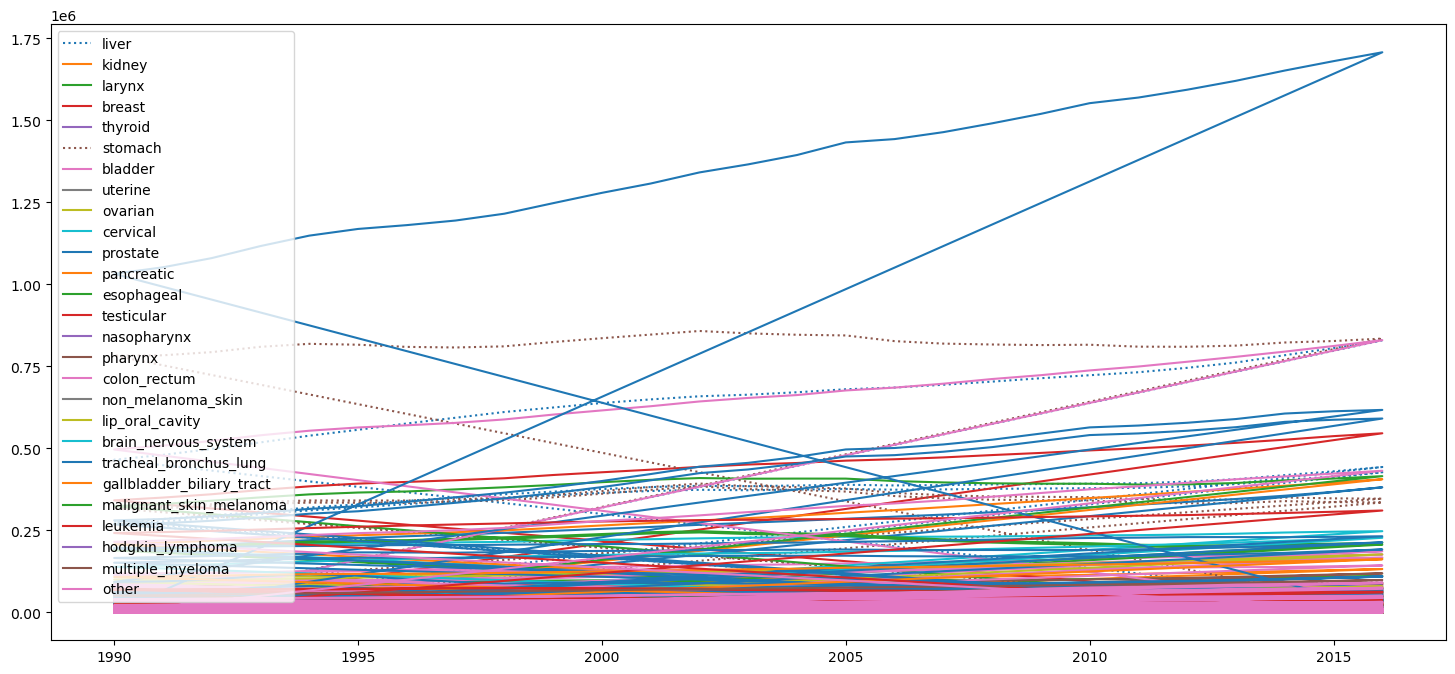

In [98]:
# 03.18.06
# render plot
# dt08

dt08_x01 = dt08_deaths_cancer_country__00_rn['year']
dt08_y01 = dt08_deaths_cancer_country__00_rn['liver']
dt08_y02 = dt08_deaths_cancer_country__00_rn['kidney']
dt08_y03 = dt08_deaths_cancer_country__00_rn['larynx']
dt08_y04 = dt08_deaths_cancer_country__00_rn['breast']
dt08_y05 = dt08_deaths_cancer_country__00_rn['thyroid']
dt08_y06 = dt08_deaths_cancer_country__00_rn['stomach']
dt08_y07 = dt08_deaths_cancer_country__00_rn['bladder']
dt08_y08 = dt08_deaths_cancer_country__00_rn['uterine']
dt08_y09 = dt08_deaths_cancer_country__00_rn['ovarian']
dt08_y10 = dt08_deaths_cancer_country__00_rn['cervical']
dt08_y11 = dt08_deaths_cancer_country__00_rn['prostate']
dt08_y12 = dt08_deaths_cancer_country__00_rn['pancreatic']
dt08_y13 = dt08_deaths_cancer_country__00_rn['esophageal']
dt08_y14 = dt08_deaths_cancer_country__00_rn['testicular']
dt08_y15 = dt08_deaths_cancer_country__00_rn['nasopharynx']
dt08_y16 = dt08_deaths_cancer_country__00_rn['pharynx']
dt08_y17 = dt08_deaths_cancer_country__00_rn['colon_rectum']
dt08_y18 = dt08_deaths_cancer_country__00_rn['non_melanoma_skin']
dt08_y19 = dt08_deaths_cancer_country__00_rn['lip_oral_cavity']
dt08_y20 = dt08_deaths_cancer_country__00_rn['brain_nervous_system']
dt08_y21 = dt08_deaths_cancer_country__00_rn['tracheal_bronchus_lung']
dt08_y22 = dt08_deaths_cancer_country__00_rn['gallbladder_biliary_tract']
dt08_y23 = dt08_deaths_cancer_country__00_rn['malignant_skin_melanoma']
dt08_y24 = dt08_deaths_cancer_country__00_rn['leukemia']
dt08_y25 = dt08_deaths_cancer_country__00_rn['hodgkin_lymphoma']
dt08_y26 = dt08_deaths_cancer_country__00_rn['multiple_myeloma']
dt08_y27 = dt08_deaths_cancer_country__00_rn['other']
plt.figure(figsize=(18,8))
plt.plot(dt08_x01, dt08_y01, label = "liver", linestyle="dotted")
plt.plot(dt08_x01, dt08_y02, label = "kidney", linestyle="-")
plt.plot(dt08_x01, dt08_y03, label = "larynx", linestyle="-")
plt.plot(dt08_x01, dt08_y04, label = "breast", linestyle="-")
plt.plot(dt08_x01, dt08_y05, label = "thyroid", linestyle="-")
plt.plot(dt08_x01, dt08_y06, label = "stomach", linestyle="dotted")
plt.plot(dt08_x01, dt08_y07, label = "bladder", linestyle="-")
plt.plot(dt08_x01, dt08_y08, label = "uterine", linestyle="-")
plt.plot(dt08_x01, dt08_y09, label = "ovarian", linestyle="-")
plt.plot(dt08_x01, dt08_y10, label = "cervical", linestyle="-")
plt.plot(dt08_x01, dt08_y11, label = "prostate", linestyle="-")
plt.plot(dt08_x01, dt08_y12, label = "pancreatic", linestyle="-")
plt.plot(dt08_x01, dt08_y13, label = "esophageal", linestyle="-")
plt.plot(dt08_x01, dt08_y14, label = "testicular", linestyle="-")
plt.plot(dt08_x01, dt08_y15, label = "nasopharynx", linestyle="-")
plt.plot(dt08_x01, dt08_y16, label = "pharynx", linestyle="-")
plt.plot(dt08_x01, dt08_y17, label = "colon_rectum", linestyle="-")
plt.plot(dt08_x01, dt08_y18, label = "non_melanoma_skin", linestyle="-")
plt.plot(dt08_x01, dt08_y19, label = "lip_oral_cavity", linestyle="-")
plt.plot(dt08_x01, dt08_y20, label = "brain_nervous_system", linestyle="-")
plt.plot(dt08_x01, dt08_y21, label = "tracheal_bronchus_lung", linestyle="-")
plt.plot(dt08_x01, dt08_y22, label = "gallbladder_biliary_tract", linestyle="-")
plt.plot(dt08_x01, dt08_y23, label = "malignant_skin_melanoma", linestyle="-")
plt.plot(dt08_x01, dt08_y24, label = "leukemia", linestyle="-")
plt.plot(dt08_x01, dt08_y25, label = "hodgkin_lymphoma", linestyle="-")
plt.plot(dt08_x01, dt08_y26, label = "multiple_myeloma", linestyle="-")
plt.plot(dt08_x01, dt08_y27, label = "other", linestyle="-")
plt.legend() 
plt.show()

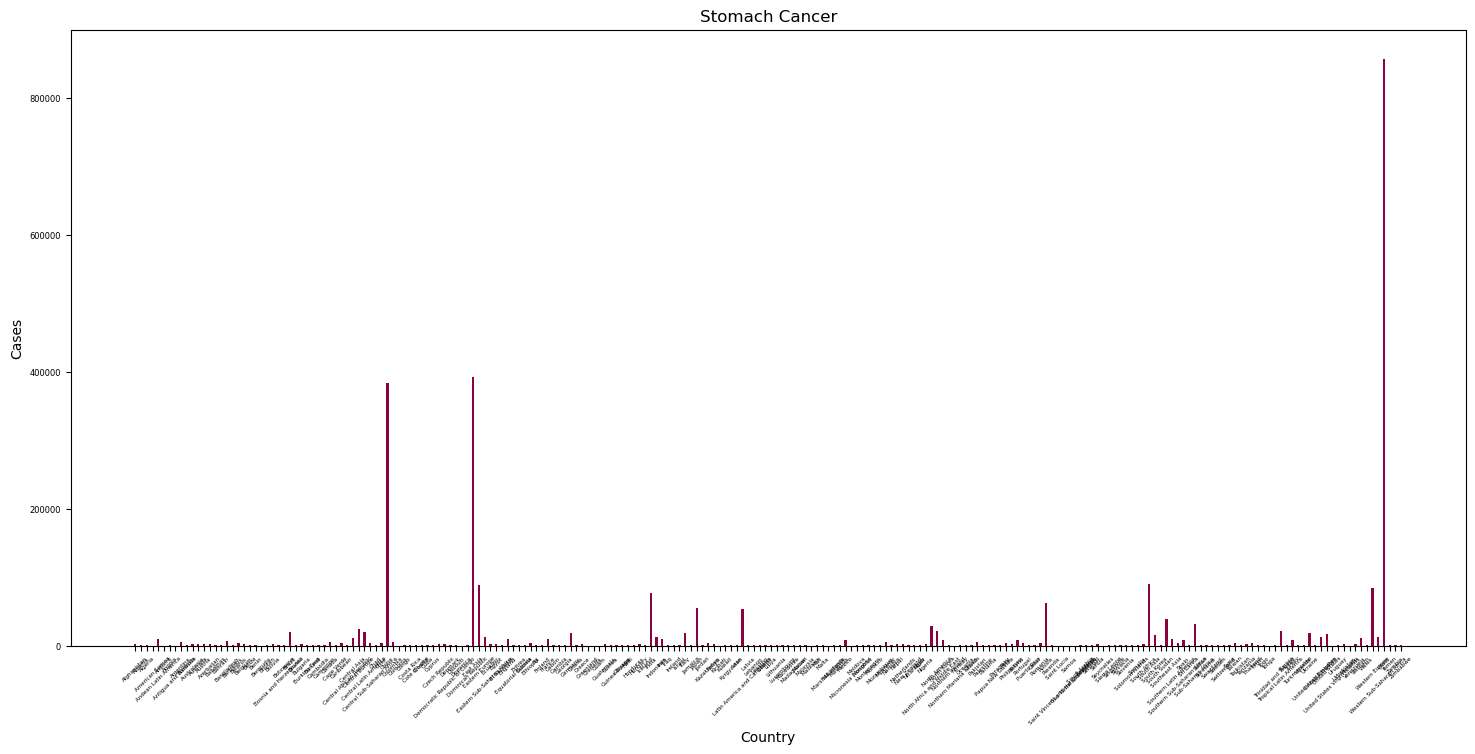

In [99]:
# 03.18.07
# render plot
# dt08

plt.figure(figsize=(18,8))
plt.bar(dt08_deaths_cancer_country__00_rn['country'], dt08_deaths_cancer_country__00_rn['stomach'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 4)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Stomach Cancer')
plt.show()

In [100]:
# 03.19.01
# preparing data for modeling
# add index column
# index column to select specific rows 
# dt08

dt08_deaths_cancer_country__00_rn.insert(0, 'index', range(0, 0 + len(dt08_deaths_cancer_country__00_rn)))

In [101]:
# 03.19.02
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt08

dt08_deaths_cancer_country__00_rn_dv = pd.get_dummies(dt08_deaths_cancer_country__00_rn, drop_first = True, dtype = int)

In [102]:
# 03.19.03
# preparing data for modeling
# split data
# select columns 
# dt08

dt08_x01 = dt08_deaths_cancer_country__00_rn_dv.drop(['stomach'], axis = 1)
dt08_y01 = dt08_deaths_cancer_country__00_rn_dv['stomach']

In [103]:
# 03.19.04
# preparing data for modeling
# split into train and test 
# dt08

dt08_x01_trn, dt08_x01_tst, dt08_y01_trn, dt08_y01_tst = train_test_split(dt08_x01, dt08_y01, test_size = 0.3, random_state = 0)

In [104]:
# 03.19.05
# preparing data for modeling
# assign regression variable 
# dt08

dt08_lr01 = LinearRegression()

In [105]:
# 03.19.06
# fit data for modeling
# fit variables to model 
# dt08

dt08_lr01.fit(dt08_x01_trn, dt08_y01_trn)

LinearRegression()

In [106]:
# 03.19.07
# predict data for modeling
# fit variables to model 
# dt08

dt08_y01_pdct = dt08_lr01.predict(dt08_x01_tst)

In [107]:
# 03.19.08
# preparing data for modeling
# assign variable for rmse and r2 
# dt08

dt08_rmse01 = np.sqrt(mean_squared_error(dt08_y01_tst, dt08_y01_pdct))
dt08_r201 = r2_score(dt08_y01_tst, dt08_y01_pdct)

In [108]:
# 03.19.09
# run model
# return rmse and r2 dt08
# rmse: 524.1157921287804
# r2: 0.9999158677562587
# dt08

print(f'rmse: {dt08_rmse01}')
print(f'r2: {dt08_r201}')

rmse: 524.1169128982002
r2: 0.9999158673964416


In [109]:
# 03.19.10
# assign variable for pca
# dt08

pca = PCA(.9)

In [110]:
# 03.19.11
# calculate pca
# dt08

pca.fit(dt08_x01_trn)
dt08_x01_pca_trn = pca.transform(dt08_x01_trn)
dt08_x01_pca_tst = pca.transform(dt08_x01_tst)

In [111]:
# 03.19.12
# return pca calculation matrix
# dt08

print(f'features in pca matrix: {dt08_x01_pca_trn.shape[1]}')

features in pca matrix: 1


In [112]:
# 03.20.01
# filter South Korea
# dt08

dt08_deaths_cancer_country__00_rn.set_index("country", inplace = True)
dt08_deaths_cancer_country__00_rn_sl = dt08_deaths_cancer_country__00_rn.loc["South Korea"]
print(dt08_deaths_cancer_country__00_rn_sl)

             index code  year  ...  hodgkin_lymphoma  multiple_myeloma        other
country                        ...                                                 
South Korea   4806  KOR  1990  ...         57.948902        256.289640  1624.034625
South Korea   4807  KOR  1991  ...         56.350628        270.704007  1685.034970
South Korea   4808  KOR  1992  ...         54.564861        285.454792  1713.942187
South Korea   4809  KOR  1993  ...         52.829617        299.525381  1728.813906
South Korea   4810  KOR  1994  ...         51.474612        313.259552  1747.399692
South Korea   4811  KOR  1995  ...         51.025572        321.731810  1758.194003
South Korea   4812  KOR  1996  ...         49.862174        335.498419  1783.009781
South Korea   4813  KOR  1997  ...         49.390185        354.982165  1808.621690
South Korea   4814  KOR  1998  ...         50.175604        381.163001  1843.201785
South Korea   4815  KOR  1999  ...         51.018411        412.528598  1887

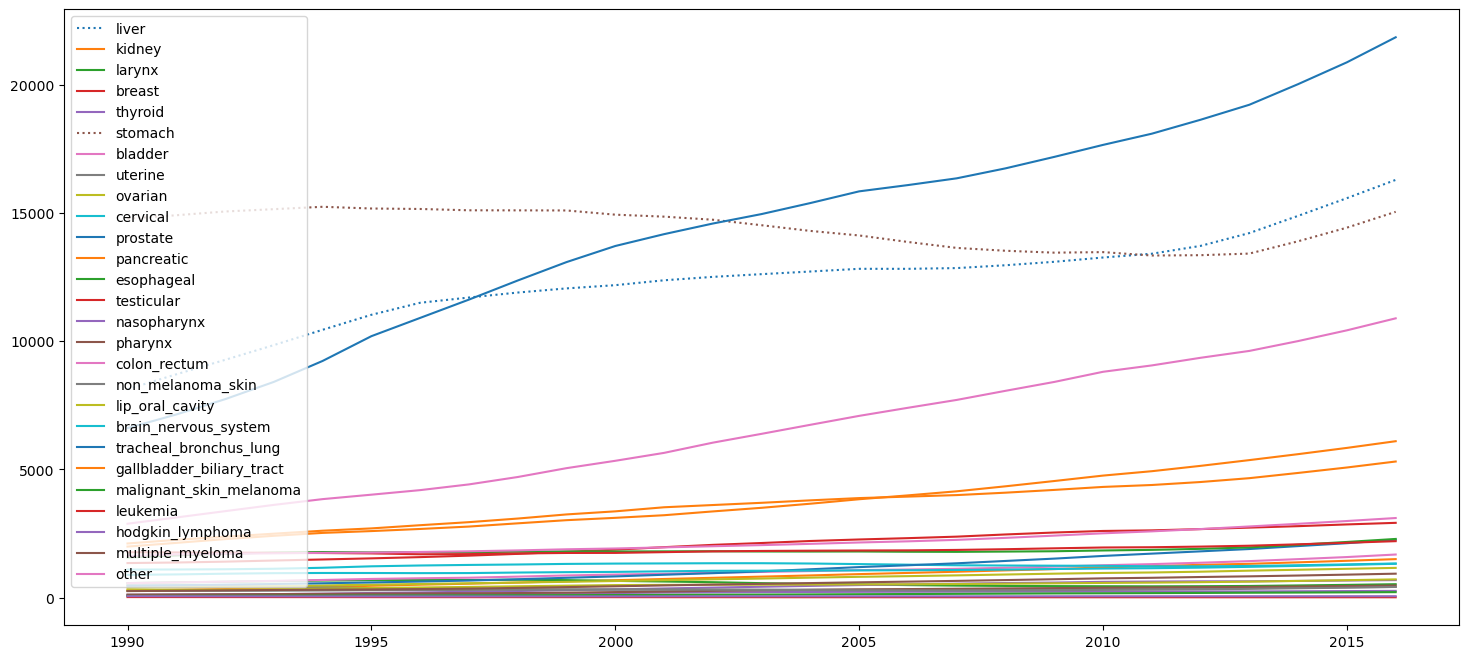

In [113]:
# 03.20.02
# render plot
# dt08

dt08_x01_sl = dt08_deaths_cancer_country__00_rn_sl['year']
dt08_y01_sl = dt08_deaths_cancer_country__00_rn_sl['liver']
dt08_y02_sl = dt08_deaths_cancer_country__00_rn_sl['kidney']
dt08_y03_sl = dt08_deaths_cancer_country__00_rn_sl['larynx']
dt08_y04_sl = dt08_deaths_cancer_country__00_rn_sl['breast']
dt08_y05_sl = dt08_deaths_cancer_country__00_rn_sl['thyroid']
dt08_y06_sl = dt08_deaths_cancer_country__00_rn_sl['stomach']
dt08_y07_sl = dt08_deaths_cancer_country__00_rn_sl['bladder']
dt08_y08_sl = dt08_deaths_cancer_country__00_rn_sl['uterine']
dt08_y09_sl = dt08_deaths_cancer_country__00_rn_sl['ovarian']
dt08_y10_sl = dt08_deaths_cancer_country__00_rn_sl['cervical']
dt08_y11_sl = dt08_deaths_cancer_country__00_rn_sl['prostate']
dt08_y12_sl = dt08_deaths_cancer_country__00_rn_sl['pancreatic']
dt08_y13_sl = dt08_deaths_cancer_country__00_rn_sl['esophageal']
dt08_y14_sl = dt08_deaths_cancer_country__00_rn_sl['testicular']
dt08_y15_sl = dt08_deaths_cancer_country__00_rn_sl['nasopharynx']
dt08_y16_sl = dt08_deaths_cancer_country__00_rn_sl['pharynx']
dt08_y17_sl = dt08_deaths_cancer_country__00_rn_sl['colon_rectum']
dt08_y18_sl = dt08_deaths_cancer_country__00_rn_sl['non_melanoma_skin']
dt08_y19_sl = dt08_deaths_cancer_country__00_rn_sl['lip_oral_cavity']
dt08_y20_sl = dt08_deaths_cancer_country__00_rn_sl['brain_nervous_system']
dt08_y21_sl = dt08_deaths_cancer_country__00_rn_sl['tracheal_bronchus_lung']
dt08_y22_sl = dt08_deaths_cancer_country__00_rn_sl['gallbladder_biliary_tract']
dt08_y23_sl = dt08_deaths_cancer_country__00_rn_sl['malignant_skin_melanoma']
dt08_y24_sl = dt08_deaths_cancer_country__00_rn_sl['leukemia']
dt08_y25_sl = dt08_deaths_cancer_country__00_rn_sl['hodgkin_lymphoma']
dt08_y26_sl = dt08_deaths_cancer_country__00_rn_sl['multiple_myeloma']
dt08_y27_sl = dt08_deaths_cancer_country__00_rn_sl['other']
plt.figure(figsize=(18,8))
plt.plot(dt08_x01_sl, dt08_y01_sl, label = "liver", linestyle="dotted")
plt.plot(dt08_x01_sl, dt08_y02_sl, label = "kidney", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y03_sl, label = "larynx", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y04_sl, label = "breast", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y05_sl, label = "thyroid", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y06_sl, label = "stomach", linestyle="dotted")
plt.plot(dt08_x01_sl, dt08_y07_sl, label = "bladder", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y08_sl, label = "uterine", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y09_sl, label = "ovarian", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y10_sl, label = "cervical", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y11_sl, label = "prostate", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y12_sl, label = "pancreatic", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y13_sl, label = "esophageal", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y14_sl, label = "testicular", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y15_sl, label = "nasopharynx", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y16_sl, label = "pharynx", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y17_sl, label = "colon_rectum", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y18_sl, label = "non_melanoma_skin", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y19_sl, label = "lip_oral_cavity", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y20_sl, label = "brain_nervous_system", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y21_sl, label = "tracheal_bronchus_lung", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y22_sl, label = "gallbladder_biliary_tract", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y23_sl, label = "malignant_skin_melanoma", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y24_sl, label = "leukemia", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y25_sl, label = "hodgkin_lymphoma", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y26_sl, label = "multiple_myeloma", linestyle="-")
plt.plot(dt08_x01_sl, dt08_y27_sl, label = "other", linestyle="-")
plt.legend() 
plt.show()

In [114]:
# 03.21.01
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt08

dt08_deaths_cancer_country__00_rn_sl_dv = pd.get_dummies(dt08_deaths_cancer_country__00_rn_sl, drop_first = True, dtype = int)

In [115]:
# 03.21.02
# preparing data for modeling
# split data
# select columns 
# dt08

dt08_x01_sl_dv = dt08_deaths_cancer_country__00_rn_sl_dv.drop(['stomach'], axis = 1)
dt08_y01_sl_dv = dt08_deaths_cancer_country__00_rn_sl_dv['stomach']

In [116]:
# 03.21.03
# preparing data for modeling
# split into train and test 
# dt08

dt08_x01_trn_sl_dv, dt08_x01_tst_sl_dv, dt08_y01_trn_sl_dv, dt08_y01_tst_sl_dv = train_test_split(dt08_x01_sl_dv, dt08_y01_sl_dv, test_size = 0.3, random_state = 0)

In [117]:
# 03.21.04
# preparing data for modeling
# assign regression variable 
# dt08

dt08_lr01_sl_dv = LinearRegression()

In [118]:
# 03.21.05
# fit data for modeling
# fit variables to model 
# dt08

dt08_lr01_sl_dv.fit(dt08_x01_trn_sl_dv, dt08_y01_trn_sl_dv)

LinearRegression()

In [119]:
# 03.21.06
# predict data for modeling
# fit variables to model 
# dt08

dt08_y01_pdct_sl_dv = dt08_lr01_sl_dv.predict(dt08_x01_tst_sl_dv)

In [120]:
# 03.21.07
# preparing data for modeling
# assign variable for rmse and r2 
# dt08

dt08_rmse01_sl_dv = np.sqrt(mean_squared_error(dt08_y01_tst_sl_dv, dt08_y01_pdct_sl_dv))
dt08_r201_sl_dv = r2_score(dt08_y01_tst_sl_dv, dt08_y01_pdct_sl_dv)

In [121]:
# 03.21.08
# run model
# return rmse and r2 dt08
# rmse: 53.72681931079708
# r2: 0.9931278582281692
# dt08

print(f'rmse: {dt08_rmse01_sl_dv}')
print(f'r2: {dt08_r201_sl_dv}')

rmse: 53.72681931079593
r2: 0.9931278582281694


In [122]:
# 03.21.09
# assign variable for pca
# dt08

pca = PCA(.9)

In [123]:
# 03.21.10
# calculate pca
# dt08

pca.fit(dt08_x01_trn_sl_dv)
dt08_x01_pca_trn_sl_dv = pca.transform(dt08_x01_trn_sl_dv)
dt08_x01_pca_tst_sl_dv = pca.transform(dt08_x01_tst_sl_dv)

In [124]:
# 03.21.11
# return pca calculation matrix
# dt08

print(f'features in pca matrix: {dt08_x01_pca_trn_sl_dv.shape[1]}')

features in pca matrix: 1


In [125]:
# 04.01.01
# read csv
# dataset Gender Inequality Index.csv
# dt09

dt09_index_gend_ineq________00 = pd.read_csv('Gender Inequality Index.csv')

In [126]:
# 04.01.02
# read csv
# dataset Avg_hours_worked_(1950-2017).csv
# dt10

dt10_ave_hrs_worked_________00 = pd.read_csv('Avg_hours_worked_(1950-2017).csv')

In [127]:
# 04.01.03
# read csv
# dataset Time_use_OECD.csv
# dt11

dt11_time_use_oecd__________00 = pd.read_csv('Time_use_OECD.csv')

In [128]:
# 04.01.04
# read csv
# dataset Yearly_RGDPO_(1950-2017).csv
# dt12

dt12_yearly_rgdpo___________00 = pd.read_csv('Yearly_RGDPO_(1950-2017).csv')

In [129]:
# 04.02.01
# return first and last ten rows
# dt09

print(dt09_index_gend_ineq________00.head(10))
print(dt09_index_gend_ineq________00.tail(10))

  ISO3  ... Gender Inequality Index (2021)
0  AFG  ...                          0.678
1  AGO  ...                          0.537
2  ALB  ...                          0.144
3  AND  ...                            NaN
4  ARE  ...                          0.049
5  ARG  ...                          0.287
6  ARM  ...                          0.216
7  ATG  ...                            NaN
8  AUS  ...                          0.073
9  AUT  ...                          0.053

[10 rows x 40 columns]
    ISO3  ... Gender Inequality Index (2021)
185  UZB  ...                          0.227
186  VCT  ...                          0.390
187  VEN  ...                          0.492
188  VNM  ...                          0.296
189  VUT  ...                            NaN
190  WSM  ...                          0.418
191  YEM  ...                          0.820
192  ZAF  ...                          0.405
193  ZMB  ...                          0.540
194  ZWE  ...                          0.532

[10 row

In [130]:
# 04.02.02
# return first and last ten rows
# dt10

print(dt10_ave_hrs_worked_________00.head(10))
print(dt10_ave_hrs_worked_________00.tail(10))

   Year RegionCode  PersonsEngaged  AvgHoursWorked
0  1950        AUS        3.429873     2170.923406
1  1951        AUS        3.523916     2150.846928
2  1952        AUS        3.591675     2130.956115
3  1953        AUS        3.653409     2111.249251
4  1954        AUS        3.731083     2091.724634
5  1955        AUS        3.811291     2072.380578
6  1956        AUS        3.895439     2053.215414
7  1957        AUS        3.946432     2034.227488
8  1958        AUS        3.981427     2015.415160
9  1959        AUS        4.030420     1996.776806
      Year RegionCode  PersonsEngaged  AvgHoursWorked
3482  2010        IND      467.412506     2110.392676
3483  2011        IND      472.214478     2113.624592
3484  2012        IND      469.831085     2115.713864
3485  2013        IND      483.854340     2117.113316
3486  2014        IND      483.084595     2118.544711
3487  2015        IND      482.700470     2118.821495
3488  2016        IND      482.989014     2121.243071
3489  2

In [131]:
# 04.02.03
# return first and last ten rows
# dt11

print(dt11_time_use_oecd__________00.head(10))
print(dt11_time_use_oecd__________00.tail(10))

  Country_Code    Country DESC  Description    Sex    Age  Minutes_per_day
0          AUS  Australia  UPW  Unpaid work  Women  15-64        311.00000
1          AUS  Australia  UPW  Unpaid work    Men  15-64        171.59583
2          AUT    Austria  UPW  Unpaid work  Women  15-64        269.17200
3          AUT    Austria  UPW  Unpaid work    Men  15-64        135.28297
4          BEL    Belgium  UPW  Unpaid work  Women  15-64        237.32297
5          BEL    Belgium  UPW  Unpaid work    Men  15-64        144.17238
6          CAN     Canada  UPW  Unpaid work  Women  15-64        223.65640
7          CAN     Canada  UPW  Unpaid work    Men  15-64        148.13789
8          DNK    Denmark  UPW  Unpaid work  Women  15-64        242.80872
9          DNK    Denmark  UPW  Unpaid work    Men  15-64        186.13608
    Country_Code     Country DESC  ...    Sex    Age Minutes_per_day
319          LTU   Lithuania  LEI  ...  Women  15-64      215.298860
320          LTU   Lithuania  LEI  ..

In [132]:
# 04.02.04
# return first and last ten rows
# dt12

print(dt12_yearly_rgdpo___________00.head(10))
print(dt12_yearly_rgdpo___________00.tail(10))

   YearCode RegionCode        pop          rgdpo
0      1950        ARG  17.091824   50108.761719
1      1950        AUS   8.354106  114123.632812
2      1950        AUT   6.980751   41605.027344
3      1950        BEL   8.634331   72084.273438
4      1950        BOL   2.853718    6936.597168
5      1950        BRA  53.124132   88442.671875
6      1950        CAN  13.769420  177335.015625
7      1950        CHE   4.607004   74871.406250
8      1950        COD  12.466165   26857.605469
9      1950        COL  11.618923   40504.574219
       YearCode RegionCode         pop         rgdpo
10389      2019        USA  329.064917  2.059584e+07
10390      2019        UZB   32.981716  4.147685e+05
10391      2019        VCT    0.110589  1.227714e+03
10392      2019        VEN   28.515829  7.160107e+03
10393      2019        VGB    0.030030  1.122182e+03
10394      2019        VNM   96.462106  7.241234e+05
10395      2019        YEM   29.161922  5.182806e+04
10396      2019        ZAF   58.55827

In [133]:
# 04.03.01
# return columns
# dt

print(dt09_index_gend_ineq________00.columns)
print(dt10_ave_hrs_worked_________00.columns)
print(dt11_time_use_oecd__________00.columns)
print(dt12_yearly_rgdpo___________00.columns)

Index(['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'GII Rank (2021)', 'Gender Inequality Index (1990)',
       'Gender Inequality Index (1991)', 'Gender Inequality Index (1992)',
       'Gender Inequality Index (1993)', 'Gender Inequality Index (1994)',
       'Gender Inequality Index (1995)', 'Gender Inequality Index (1996)',
       'Gender Inequality Index (1997)', 'Gender Inequality Index (1998)',
       'Gender Inequality Index (1999)', 'Gender Inequality Index (2000)',
       'Gender Inequality Index (2001)', 'Gender Inequality Index (2002)',
       'Gender Inequality Index (2003)', 'Gender Inequality Index (2004)',
       'Gender Inequality Index (2005)', 'Gender Inequality Index (2006)',
       'Gender Inequality Index (2007)', 'Gender Inequality Index (2008)',
       'Gender Inequality Index (2009)', 'Gender Inequality Index (2010)',
       'Gender Inequality Index (2011)', 'Gender Inequal

In [134]:
# 04.04.01
# column rename to remove spaces
# dt09

dt09_index_gend_ineq________00_rn = dt09_index_gend_ineq________00.rename(columns = {
    'ISO3': 'ISO3',
    'Country': 'country',
    'Continent': 'continent',
    'Hemisphere': 'hemisphere',
    'Human Development Groups': 'groups_human_dev',
    'UNDP Developing Regions': 'regions_UNDP_dev',
    'HDI Rank (2021)': 'rank_HDI',
    'GII Rank (2021)': 'rank_GII',
    'Gender Inequality Index (1990)': 'index_gender_ineq_1990',
    'Gender Inequality Index (1991)': 'index_gender_ineq_1991',
    'Gender Inequality Index (1992)': 'index_gender_ineq_1992',
    'Gender Inequality Index (1993)': 'index_gender_ineq_1993',
    'Gender Inequality Index (1994)': 'index_gender_ineq_1994',
    'Gender Inequality Index (1995)': 'index_gender_ineq_1995',
    'Gender Inequality Index (1996)': 'index_gender_ineq_1996',
    'Gender Inequality Index (1997)': 'index_gender_ineq_1997',
    'Gender Inequality Index (1998)': 'index_gender_ineq_1998',
    'Gender Inequality Index (1999)': 'index_gender_ineq_1999',
    'Gender Inequality Index (2000)': 'index_gender_ineq_2000',
    'Gender Inequality Index (2001)': 'index_gender_ineq_2001',
    'Gender Inequality Index (2002)': 'index_gender_ineq_2002',
    'Gender Inequality Index (2003)': 'index_gender_ineq_2003',
    'Gender Inequality Index (2004)': 'index_gender_ineq_2004',
    'Gender Inequality Index (2005)': 'index_gender_ineq_2005',
    'Gender Inequality Index (2006)': 'index_gender_ineq_2006',
    'Gender Inequality Index (2007)': 'index_gender_ineq_2007',
    'Gender Inequality Index (2008)': 'index_gender_ineq_2008',
    'Gender Inequality Index (2009)': 'index_gender_ineq_2009',
    'Gender Inequality Index (2010)': 'index_gender_ineq_2010',
    'Gender Inequality Index (2011)': 'index_gender_ineq_2011',
    'Gender Inequality Index (2012)': 'index_gender_ineq_2012',
    'Gender Inequality Index (2013)': 'index_gender_ineq_2013',
    'Gender Inequality Index (2014)': 'index_gender_ineq_2014',
    'Gender Inequality Index (2015)': 'index_gender_ineq_2015',
    'Gender Inequality Index (2016)': 'index_gender_ineq_2016',
    'Gender Inequality Index (2017)': 'index_gender_ineq_2017',
    'Gender Inequality Index (2018)': 'index_gender_ineq_2018',
    'Gender Inequality Index (2019)': 'index_gender_ineq_2019',
    'Gender Inequality Index (2020)': 'index_gender_ineq_2020',
    'Gender Inequality Index (2021)': 'index_gender_ineq_2021'
    })

In [135]:
# 04.04.02
# column rename to remove spaces
# dt10

dt10_ave_hrs_worked_________00_rn = dt10_ave_hrs_worked_________00.rename(columns = {
    'Year': 'year',
    'RegionCode': 'region',
    'PersonsEngaged': 'persons_engaged',
    'AvgHoursWorked': 'ave_hrs_worked'
    })

In [136]:
# 04.04.03
# column rename to remove spaces
# dt11

dt11_time_use_oecd__________00_rn = dt11_time_use_oecd__________00.rename(columns = {
    'Country_Code': 'code_country',
    'Country': 'country',
    'DESC': 'desc',
    'Description': 'description',
    'Sex': 'gender',
    'Age': 'age',
    'Minutes_per_day': 'mins_per_day'
    })

In [137]:
# 04.04.04
# column rename to remove spaces
# dt12

dt12_yearly_rgdpo___________00_rn = dt12_yearly_rgdpo___________00.rename(columns = {
    'YearCode': 'code_year',
    'RegionCode': 'code_country',
    'pop': 'pop',
    'rgdpo': 'rgdpo'
    })

In [138]:
# 04.05.01
# return columns
# dt

print(dt09_index_gend_ineq________00_rn.columns)
print(dt10_ave_hrs_worked_________00_rn.columns)
print(dt11_time_use_oecd__________00_rn.columns)
print(dt12_yearly_rgdpo___________00_rn.columns)

Index(['ISO3', 'country', 'continent', 'hemisphere', 'groups_human_dev',
       'regions_UNDP_dev', 'rank_HDI', 'rank_GII', 'index_gender_ineq_1990',
       'index_gender_ineq_1991', 'index_gender_ineq_1992',
       'index_gender_ineq_1993', 'index_gender_ineq_1994',
       'index_gender_ineq_1995', 'index_gender_ineq_1996',
       'index_gender_ineq_1997', 'index_gender_ineq_1998',
       'index_gender_ineq_1999', 'index_gender_ineq_2000',
       'index_gender_ineq_2001', 'index_gender_ineq_2002',
       'index_gender_ineq_2003', 'index_gender_ineq_2004',
       'index_gender_ineq_2005', 'index_gender_ineq_2006',
       'index_gender_ineq_2007', 'index_gender_ineq_2008',
       'index_gender_ineq_2009', 'index_gender_ineq_2010',
       'index_gender_ineq_2011', 'index_gender_ineq_2012',
       'index_gender_ineq_2013', 'index_gender_ineq_2014',
       'index_gender_ineq_2015', 'index_gender_ineq_2016',
       'index_gender_ineq_2017', 'index_gender_ineq_2018',
       'index_gender_ine

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, -5000.0, '−5000'),
  Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000')])

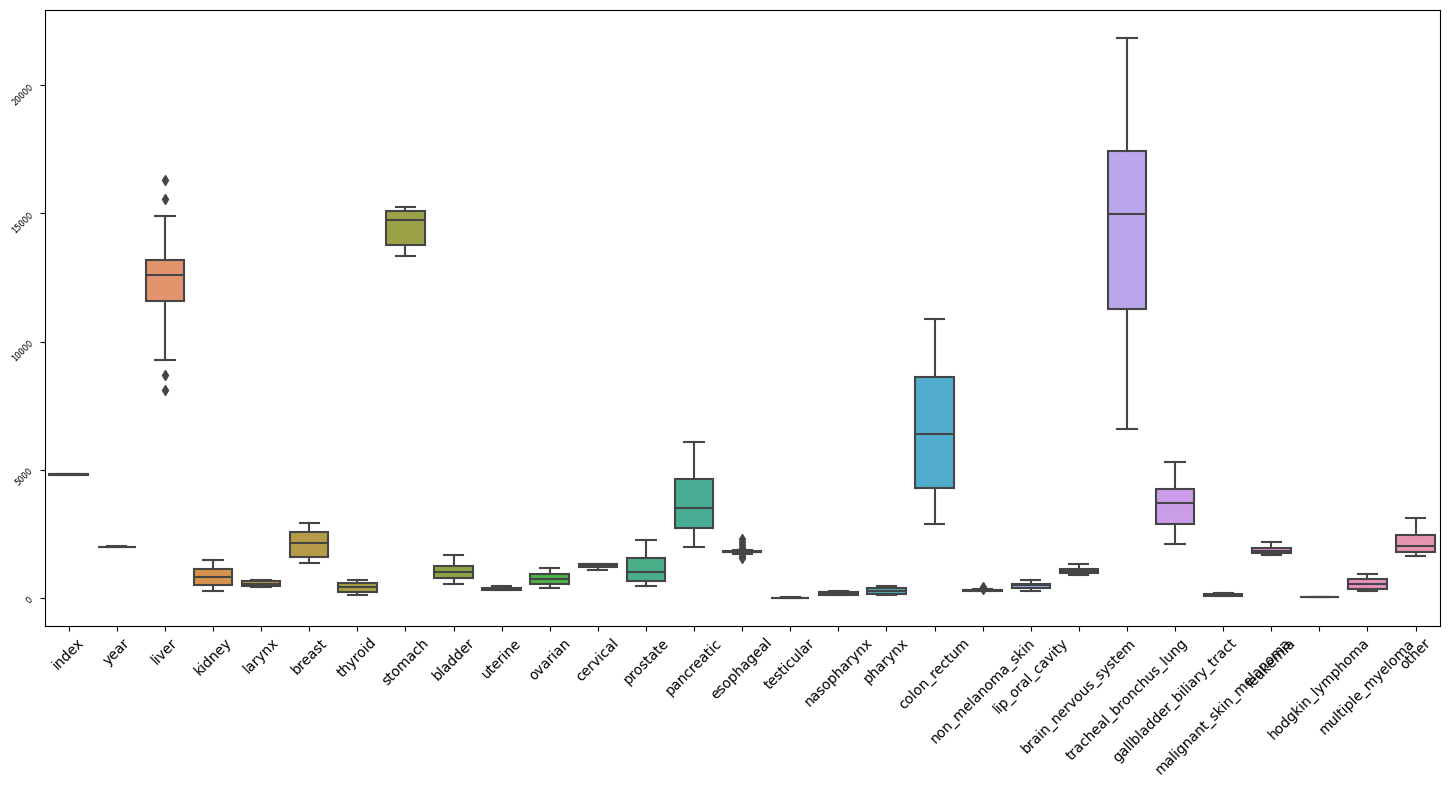

In [139]:
# 04.06.01
# return columns
# dt08

plt.figure(figsize=(18,8))
sns.boxplot(dt08_deaths_cancer_country__00_rn_sl)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 45)

In [140]:
# 04.06.02
# drop columns
# dt08

dt08_deaths_cancer_country__00_rn_sl_drp = dt08_deaths_cancer_country__00_rn_sl.drop(['code', 'index', 'year'], axis=1)
print(dt08_deaths_cancer_country__00_rn_sl_drp.head(10))
print(dt08_deaths_cancer_country__00_rn_sl_drp.tail(10))

                    liver      kidney  ...  multiple_myeloma        other
country                                ...                               
South Korea   8126.358911  283.292188  ...        256.289640  1624.034625
South Korea   8710.383659  307.459162  ...        270.704007  1685.034970
South Korea   9273.740098  335.785109  ...        285.454792  1713.942187
South Korea   9848.954380  370.542915  ...        299.525381  1728.813906
South Korea  10446.210170  413.027777  ...        313.259552  1747.399692
South Korea  11031.085180  464.111895  ...        321.731810  1758.194003
South Korea  11500.187290  506.882706  ...        335.498419  1783.009781
South Korea  11704.476540  545.187478  ...        354.982165  1808.621690
South Korea  11898.728230  589.578764  ...        381.163001  1843.201785
South Korea  12060.416460  637.863876  ...        412.528598  1887.086008

[10 rows x 27 columns]
                   liver       kidney  ...  multiple_myeloma        other
country       

In [141]:
# 04.06.03
# preparing data for modeling
# create dummy variables
# due to returning boolean values, converting dummmies to integers
# dt08

dt08_deaths_cancer_country__00_rn_sl_drp_dv = pd.get_dummies(dt08_deaths_cancer_country__00_rn_sl_drp, drop_first = True, dtype = int)

In [142]:
# 04.06.04
# preparing data for modeling
# split data
# select columns 
# dt08

dt08_x01_sl_drp_dv = dt08_deaths_cancer_country__00_rn_sl_drp_dv.drop(['stomach'], axis = 1)
dt08_y01_sl_drp_dv = dt08_deaths_cancer_country__00_rn_sl_drp_dv['stomach']

In [143]:
# 04.06.05
# preparing data for modeling
# split into train and test 
# dt08

dt08_x01_trn_sl_drp_dv, dt08_x01_tst_sl_drp_dv, dt08_y01_trn_sl_drp_dv, dt08_y01_tst_sl_drp_dv = train_test_split(dt08_x01_sl_drp_dv, dt08_y01_sl_drp_dv, test_size = 0.3, random_state = 0)

In [144]:
# 04.06.06
# preparing data for modeling
# assign regression variable 
# dt08

dt08_lr01_sl_drp_dv = LinearRegression()

In [145]:
# 04.06.07
# fit data for modeling
# fit variables to model 
# dt08

dt08_lr01_sl_drp_dv.fit(dt08_x01_trn_sl_drp_dv, dt08_y01_trn_sl_drp_dv)

LinearRegression()

In [146]:
# 04.06.08
# predict data for modeling
# fit variables to model 
# dt08

dt08_y01_pdct_sl_drp_dv = dt08_lr01_sl_drp_dv.predict(dt08_x01_tst_sl_drp_dv)

In [147]:
# 04.06.09
# preparing data for modeling
# assign variable for rmse and r2
# dt08

dt08_rmse01_sl_drp_dv = np.sqrt(mean_squared_error(dt08_y01_tst_sl_drp_dv, dt08_y01_pdct_sl_drp_dv))
dt08_r201_sl_drp_dv = r2_score(dt08_y01_tst_sl_drp_dv, dt08_y01_pdct_sl_drp_dv)

In [148]:
# 04.06.10
# run model
# return rmse and r2 dt08
# rmse: 53.812417953852986
# r2: 0.9931059431168425
# dt08

print(f'rmse: {dt08_rmse01_sl_drp_dv}')
print(f'r2: {dt08_r201_sl_drp_dv}')

rmse: 53.812417953853284
r2: 0.9931059431168424


In [149]:
# 04.06.11
# assign variable for pca
# dt08

pca = PCA(.9)

In [150]:
# 04.06.12
# calculate pca
# dt08

pca.fit(dt08_x01_trn_sl_drp_dv)
dt08_x01_pca_trn_sl_drp_dv = pca.transform(dt08_x01_trn_sl_drp_dv)
dt08_x01_pca_tst_sl_drp_dv = pca.transform(dt08_x01_tst_sl_drp_dv)

In [151]:
# 04.06.13
# return pca calculation matrix
# dt08

print(f'features in pca matrix: {dt08_x01_pca_trn_sl_drp_dv.shape[1]}')

features in pca matrix: 1


In [152]:
# 04.07.02
# preparing data for modeling
# split data
# select columns 
# dt08

dt08_x01_sl_drp_dv = dt08_deaths_cancer_country__00_rn_sl_drp_dv.drop(['liver'], axis = 1)
dt08_y01_sl_drp_dv = dt08_deaths_cancer_country__00_rn_sl_drp_dv['liver']

In [153]:
# 04.07.02
# preparing data for modeling
# split into train and test 
# dt08

dt08_x01_trn_sl_drp_dv, dt08_x01_tst_sl_drp_dv, dt08_y01_trn_sl_drp_dv, dt08_y01_tst_sl_drp_dv = train_test_split(dt08_x01_sl_drp_dv, dt08_y01_sl_drp_dv, test_size = 0.3, random_state = 0)

In [154]:
# 04.07.03
# preparing data for modeling
# assign regression variable 
# dt08

dt08_lr01_sl_drp_dv = LinearRegression()

In [155]:
# 04.07.04
# fit data for modeling
# fit variables to model 
# dt08

dt08_lr01_sl_drp_dv.fit(dt08_x01_trn_sl_drp_dv, dt08_y01_trn_sl_drp_dv)

LinearRegression()

In [156]:
# 04.07.05
# predict data for modeling
# fit variables to model 
# dt08

dt08_y01_pdct_sl_drp_dv = dt08_lr01_sl_drp_dv.predict(dt08_x01_tst_sl_drp_dv)

In [157]:
# 04.07.06
# preparing data for modeling
# assign variable for rmse and r2 
# dt08

dt08_rmse01_sl_drp_dv = np.sqrt(mean_squared_error(dt08_y01_tst_sl_drp_dv, dt08_y01_pdct_sl_drp_dv))
dt08_r201_sl_drp_dv = r2_score(dt08_y01_tst_sl_drp_dv, dt08_y01_pdct_sl_drp_dv)

In [158]:
# 04.07.07
# run model
# return rmse and r2 dt08
# rmse: 46.452605873955314
# r2: 0.9991070773907889
# dt08

print(f'rmse: {dt08_rmse01_sl_drp_dv}')
print(f'r2: {dt08_r201_sl_drp_dv}')

rmse: 46.452605873955314
r2: 0.9991070773907889


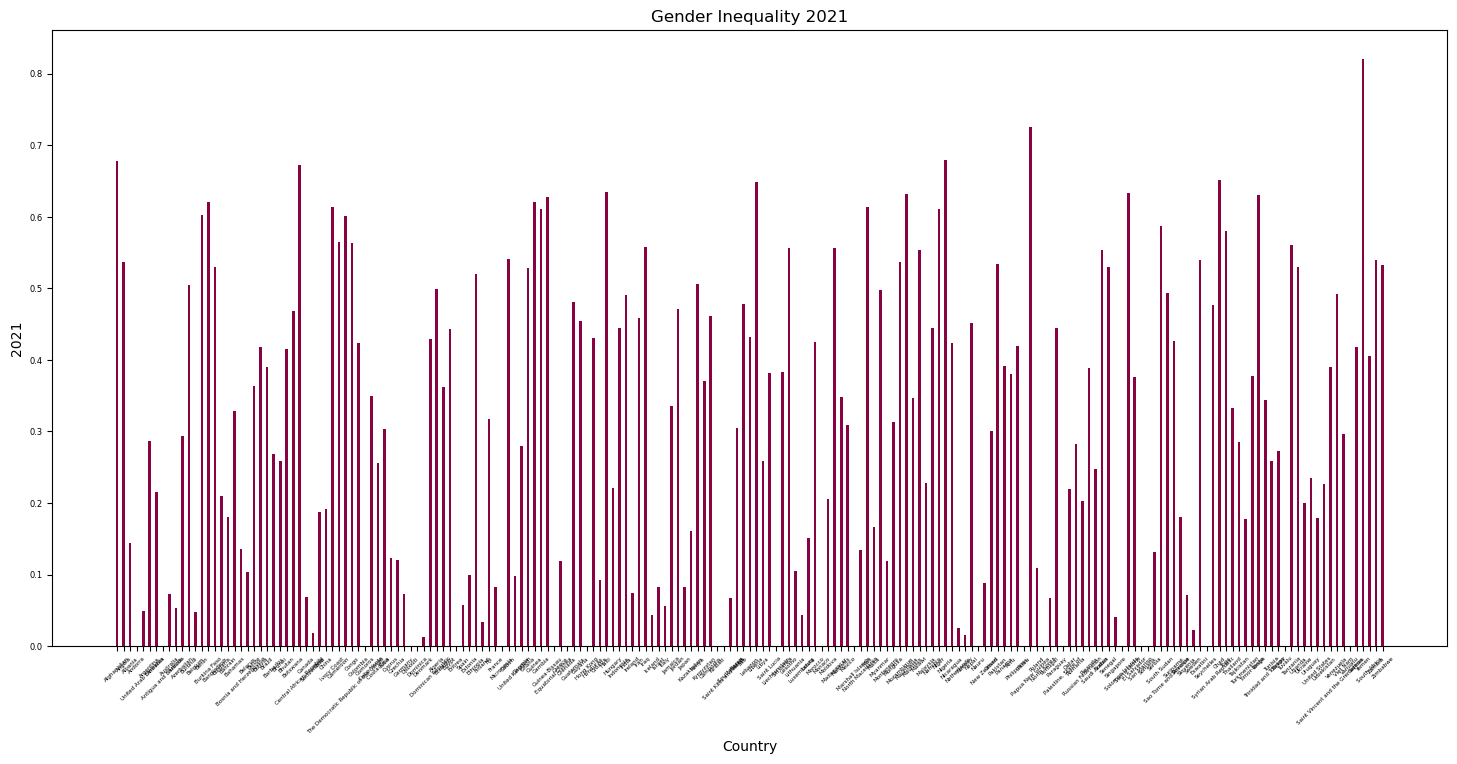

In [159]:
# 04.08.01
# render plot
# dt09

plt.figure(figsize=(18,8))
plt.bar(dt09_index_gend_ineq________00_rn['country'], dt09_index_gend_ineq________00_rn['index_gender_ineq_2021'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 4)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Country')
plt.ylabel('2021')
plt.title('Gender Inequality 2021')
plt.show()

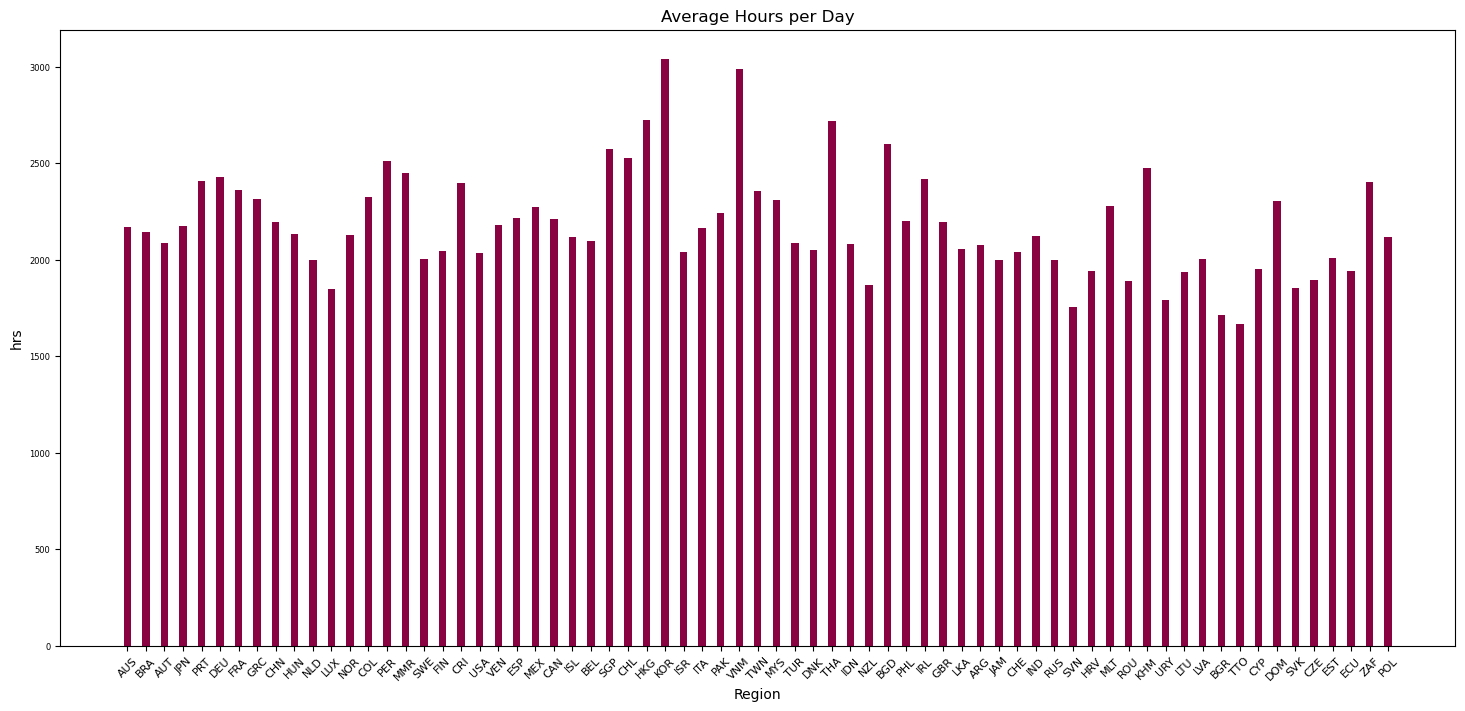

In [160]:
# 04.08.02
# render plot
# dt10

plt.figure(figsize=(18,8))
plt.bar(dt10_ave_hrs_worked_________00_rn['region'], dt10_ave_hrs_worked_________00_rn['ave_hrs_worked'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 8)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Region')
plt.ylabel('hrs')
plt.title('Average Hours per Day')
plt.show()

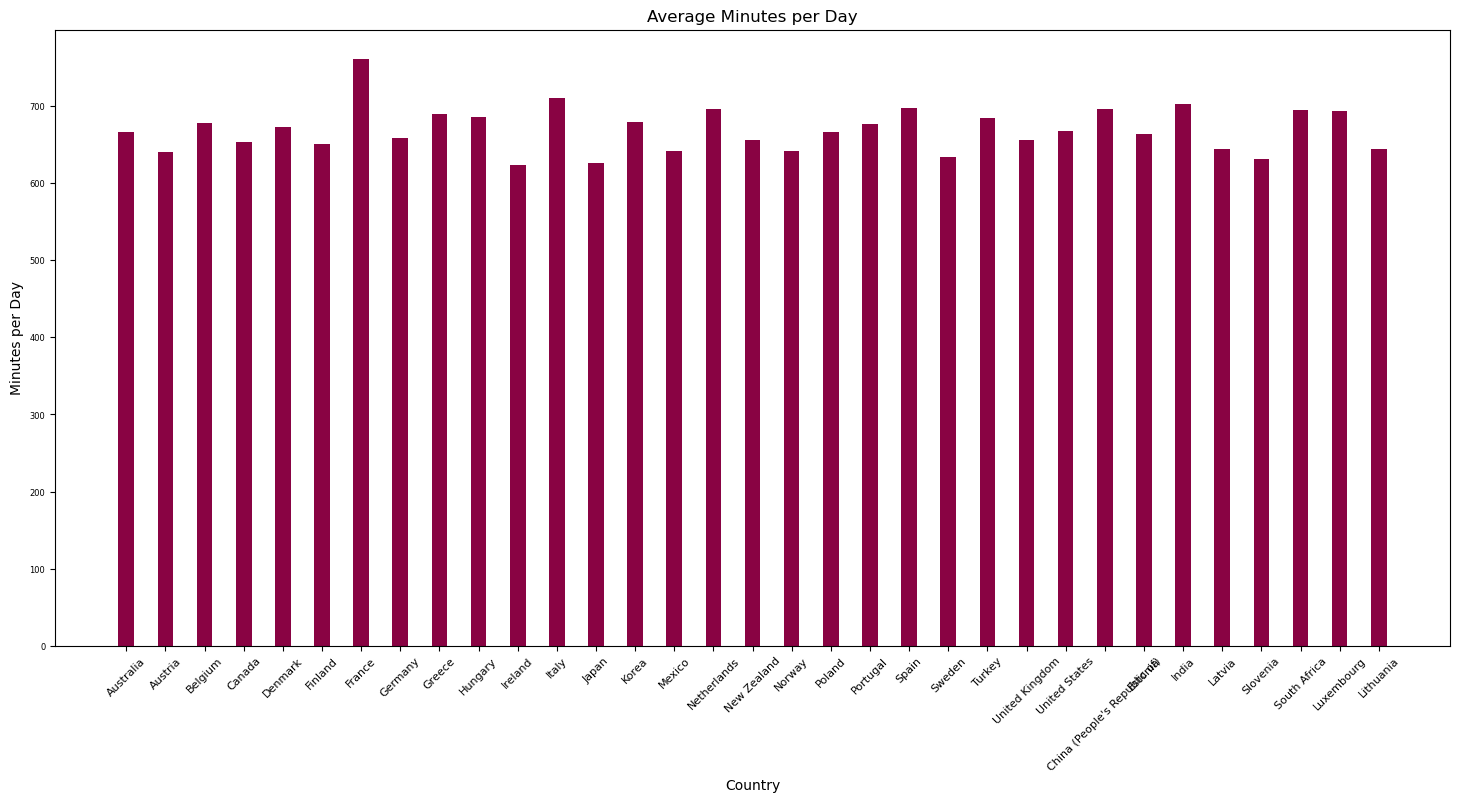

In [161]:
# 04.08.03
# render plot
# dt11

plt.figure(figsize=(18,8))
plt.bar(dt11_time_use_oecd__________00_rn['country'], dt11_time_use_oecd__________00_rn['mins_per_day'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 8)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Country')
plt.ylabel('Minutes per Day')
plt.title('Average Minutes per Day')
plt.show()

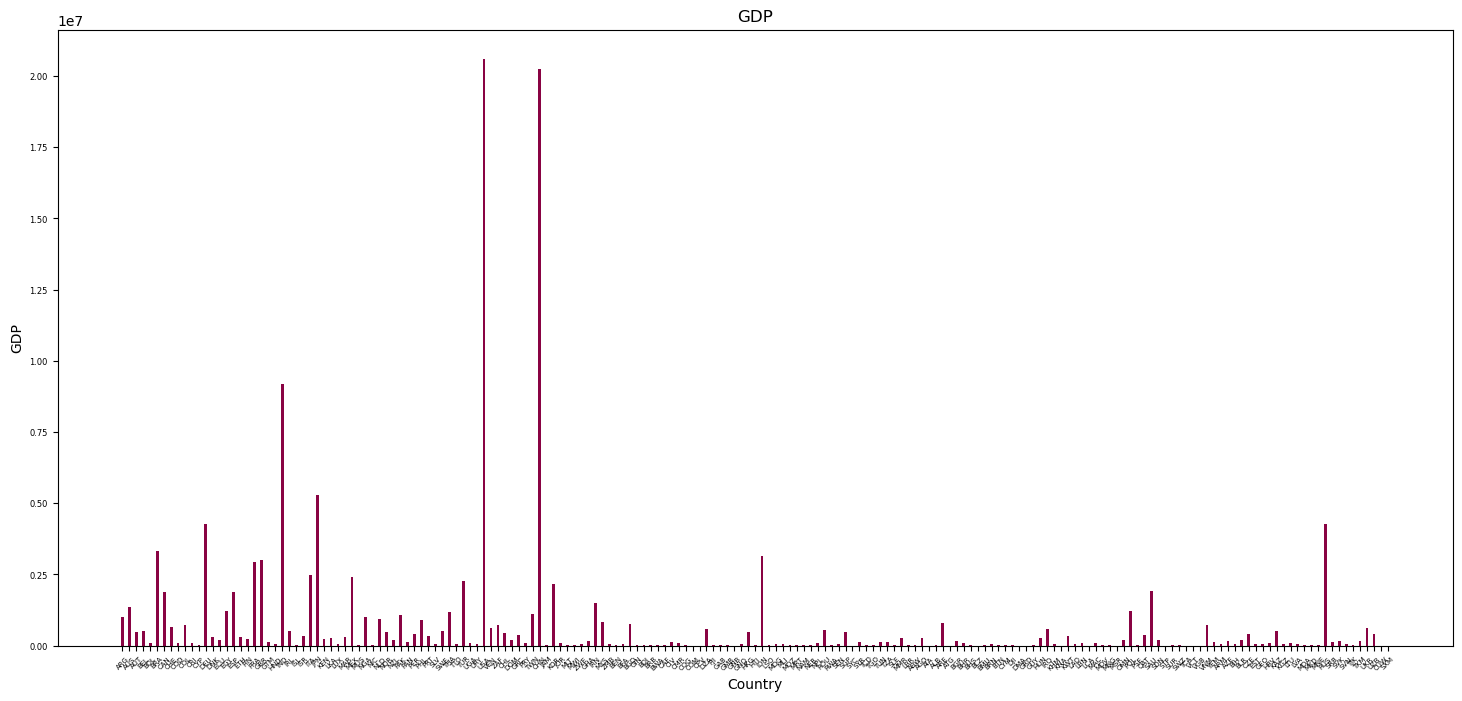

In [162]:
# 04.08.04
# render plot
# dt12

plt.figure(figsize=(18,8))
plt.bar(dt12_yearly_rgdpo___________00_rn['code_country'], dt12_yearly_rgdpo___________00_rn['rgdpo'], color = '#890343', 
        width = 0.4)
plt.xticks(fontsize = 5)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 6)
plt.yticks(rotation = 0)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP')
plt.show()

In [163]:
# 04.09.01
# filter East Asia
# dt09

dt09_index_gend_ineq________00_rn.set_index("ISO3", inplace = True)
dt09_index_gend_ineq________00_rn_chn = dt09_index_gend_ineq________00_rn.loc["CHN"]
dt09_index_gend_ineq________00_rn_jpn = dt09_index_gend_ineq________00_rn.loc["JPN"]
dt09_index_gend_ineq________00_rn_kor = dt09_index_gend_ineq________00_rn.loc["KOR"]
dt09_index_gend_ineq________00_rn_usa = dt09_index_gend_ineq________00_rn.loc["USA"]
print(dt09_index_gend_ineq________00_rn_chn)
print("---------------------------------------------")
print(dt09_index_gend_ineq________00_rn_jpn)
print("---------------------------------------------")
print(dt09_index_gend_ineq________00_rn_kor)
print("---------------------------------------------")
print(dt09_index_gend_ineq________00_rn_usa)

country                                 China
continent                                Asia
hemisphere                Northern Hemisphere
groups_human_dev                         High
regions_UNDP_dev                          EAP
rank_HDI                                 79.0
rank_GII                                 48.0
index_gender_ineq_1990                    NaN
index_gender_ineq_1991                    NaN
index_gender_ineq_1992                    NaN
index_gender_ineq_1993                    NaN
index_gender_ineq_1994                    NaN
index_gender_ineq_1995                    NaN
index_gender_ineq_1996                    NaN
index_gender_ineq_1997                    NaN
index_gender_ineq_1998                  0.278
index_gender_ineq_1999                  0.275
index_gender_ineq_2000                  0.275
index_gender_ineq_2001                  0.271
index_gender_ineq_2002                  0.264
index_gender_ineq_2003                  0.263
index_gender_ineq_2004            

In [164]:
# 04.09.02
# filter East Asia
# dt10

dt10_ave_hrs_worked_________00_rn.set_index("region", inplace = True)
dt10_ave_hrs_worked_________00_rn_chn = dt10_ave_hrs_worked_________00_rn.loc["CHN"]
dt10_ave_hrs_worked_________00_rn_jpn = dt10_ave_hrs_worked_________00_rn.loc["JPN"]
dt10_ave_hrs_worked_________00_rn_kor = dt10_ave_hrs_worked_________00_rn.loc["KOR"]
dt10_ave_hrs_worked_________00_rn_usa = dt10_ave_hrs_worked_________00_rn.loc["USA"]
print(dt10_ave_hrs_worked_________00_rn_chn)
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_jpn)
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_kor)
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_usa)

        year  persons_engaged  ave_hrs_worked
region                                       
CHN     1970       360.956390     1976.311986
CHN     1971       375.930298     1975.793683
CHN     1972       386.572205     1975.507696
CHN     1973       395.443146     1975.364796
CHN     1974       407.258118     1975.189702
CHN     1975       419.791931     1974.897441
CHN     1976       431.858154     1974.207479
CHN     1977       442.637634     1973.435254
CHN     1978       454.202850     1972.727437
CHN     1979       467.560120     1972.103818
CHN     1980       484.668854     1971.496739
CHN     1981       504.651825     1971.101620
CHN     1982       529.559326     1970.706253
CHN     1983       543.172302     1970.192731
CHN     1984       557.972107     1969.722907
CHN     1985       573.328003     1969.390464
CHN     1986       587.222839     1970.441599
CHN     1987       599.649719     1971.463312
CHN     1988       617.746460     1972.676385
CHN     1989       641.050842     

In [165]:
# 04.09.03
# filter East Asia
# dt11

dt11_time_use_oecd__________00_rn.set_index("code_country", inplace = True)
dt11_time_use_oecd__________00_rn_chn = dt11_time_use_oecd__________00_rn.loc["CHN"]
dt11_time_use_oecd__________00_rn_jpn = dt11_time_use_oecd__________00_rn.loc["JPN"]
dt11_time_use_oecd__________00_rn_kor = dt11_time_use_oecd__________00_rn.loc["KOR"]
dt11_time_use_oecd__________00_rn_usa = dt11_time_use_oecd__________00_rn.loc["USA"]
print(dt11_time_use_oecd__________00_rn_chn)
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_jpn)
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_kor)
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_usa)

                                   country desc  ...    age mins_per_day
code_country                                     ...                    
CHN           China (People's Republic of)  UPW  ...  15-64        234.0
CHN           China (People's Republic of)  UPW  ...  15-64         91.0
CHN           China (People's Republic of)  PCA  ...  15-64        692.0
CHN           China (People's Republic of)  PCA  ...  15-64        696.0
CHN           China (People's Republic of)  LEI  ...  15-64        211.0
CHN           China (People's Republic of)  LEI  ...  15-64        248.0
CHN           China (People's Republic of)  OTH  ...  15-64         12.0
CHN           China (People's Republic of)  OTH  ...  15-64         15.0
CHN           China (People's Republic of)  PAW  ...  15-64        291.0
CHN           China (People's Republic of)  PAW  ...  15-64        390.0

[10 rows x 6 columns]
---------------------------------------------
             country desc         description gender   

In [166]:
# 04.09.04
# filter East Asia
# dt12

dt12_yearly_rgdpo___________00_rn.set_index("code_country", inplace = True)
dt12_yearly_rgdpo___________00_rn_chn = dt12_yearly_rgdpo___________00_rn.loc["CHN"]
dt12_yearly_rgdpo___________00_rn_jpn = dt12_yearly_rgdpo___________00_rn.loc["JPN"]
dt12_yearly_rgdpo___________00_rn_kor = dt12_yearly_rgdpo___________00_rn.loc["KOR"]
dt12_yearly_rgdpo___________00_rn_usa = dt12_yearly_rgdpo___________00_rn.loc["USA"]
print(dt12_yearly_rgdpo___________00_rn_chn)
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_jpn)
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_kor)
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_usa)

              code_year          pop         rgdpo
code_country                                      
CHN                1952   579.577178  5.580184e+05
CHN                1953   589.316981  6.284241e+05
CHN                1954   599.942909  5.834447e+05
CHN                1955   612.053060  6.429685e+05
CHN                1956   624.568161  6.885029e+05
...                 ...          ...           ...
CHN                2015  1406.847870  1.798576e+07
CHN                2016  1414.049351  1.859171e+07
CHN                2017  1421.021791  1.968716e+07
CHN                2018  1427.647786  1.972913e+07
CHN                2019  1433.783686  2.025766e+07

[68 rows x 3 columns]
---------------------------------------------
              code_year         pop         rgdpo
code_country                                     
JPN                1950   84.274267  2.363832e+05
JPN                1951   85.640724  2.612887e+05
JPN                1952   86.943150  2.878446e+05
JPN               

In [167]:
# 04.09.05
# return columns
# dt

print(dt09_index_gend_ineq________00_rn_chn.head(3))
print(dt09_index_gend_ineq________00_rn_chn.tail(3))
print("---------------------------------------------")
print(dt09_index_gend_ineq________00_rn_jpn.head(3))
print(dt09_index_gend_ineq________00_rn_jpn.tail(3))
print("---------------------------------------------")
print(dt09_index_gend_ineq________00_rn_kor.head(3))
print(dt09_index_gend_ineq________00_rn_kor.tail(3))
print("---------------------------------------------")
print(dt09_index_gend_ineq________00_rn_usa.head(3))
print(dt09_index_gend_ineq________00_rn_usa.tail(3))
print("---------------------------------------------")
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_chn.head(3))
print(dt10_ave_hrs_worked_________00_rn_chn.tail(3))
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_jpn.head(3))
print(dt10_ave_hrs_worked_________00_rn_jpn.tail(3))
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_kor.head(3))
print(dt10_ave_hrs_worked_________00_rn_kor.tail(3))
print("---------------------------------------------")
print(dt10_ave_hrs_worked_________00_rn_usa.head(3))
print(dt10_ave_hrs_worked_________00_rn_usa.tail(3))
print("---------------------------------------------")
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_chn.head(3))
print(dt11_time_use_oecd__________00_rn_chn.tail(3))
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_jpn.head(3))
print(dt11_time_use_oecd__________00_rn_jpn.tail(3))
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_kor.head(3))
print(dt11_time_use_oecd__________00_rn_kor.tail(3))
print("---------------------------------------------")
print(dt11_time_use_oecd__________00_rn_usa.head(3))
print(dt11_time_use_oecd__________00_rn_usa.tail(3))
print("---------------------------------------------")
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_chn.head(3))
print(dt12_yearly_rgdpo___________00_rn_chn.tail(3))
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_jpn.head(3))
print(dt12_yearly_rgdpo___________00_rn_jpn.tail(3))
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_kor.head(3))
print(dt12_yearly_rgdpo___________00_rn_kor.tail(3))
print("---------------------------------------------")
print(dt12_yearly_rgdpo___________00_rn_usa.head(3))
print(dt12_yearly_rgdpo___________00_rn_usa.tail(3))

country                     China
continent                    Asia
hemisphere    Northern Hemisphere
Name: CHN, dtype: object
index_gender_ineq_2019    0.203
index_gender_ineq_2020    0.197
index_gender_ineq_2021    0.192
Name: CHN, dtype: object
---------------------------------------------
country                     Japan
continent                    Asia
hemisphere    Northern Hemisphere
Name: JPN, dtype: object
index_gender_ineq_2019     0.08
index_gender_ineq_2020    0.082
index_gender_ineq_2021    0.083
Name: JPN, dtype: object
---------------------------------------------
country               South Korea
continent                    Asia
hemisphere    Northern Hemisphere
Name: KOR, dtype: object
index_gender_ineq_2019    0.078
index_gender_ineq_2020     0.07
index_gender_ineq_2021    0.067
Name: KOR, dtype: object
---------------------------------------------
country             United States
continent                 America
hemisphere    Northern Hemisphere
Name: USA, dtype